# Packages and Functions

In [1]:
#Import standard array and plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing data preprocession functions from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Importing the Machine Learning models required from Scikit-Learn: Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Import functions to get metric scores
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve

# Import the neural network modules from tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from scikeras.wrappers import KerasClassifier

#Import supporting functions for neural nets
import random
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


import warnings
warnings.filterwarnings("ignore")

C:\Users\apara\AppData\Local\Temp\ipykernel_16212\2906232207.py:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
#Function to plot box plots and histogram
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    plt.suptitle(col)
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True) #Boxplot
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist) #Histogram
    ax_hist.axvline(data[col].mean(), color = 'green', linestyle = '--') #Mean indication line
    ax_hist.axvline(data[col].median(), color = 'black', linestyle = '-') #Median indication line
    plt.show()

In [4]:
#Function to plot stacked bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.suptitle(target)
    plt.show()

In [5]:
#Function to calculate the classification metrics and confusion matrix
def make_confusion_matrix(actual, predicted,
                          group_names=['True Negative','False Positive','False Negative','True Positive'],
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''
    print(classification_report(actual, predicted))
    cf = confusion_matrix(actual, predicted)


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

In [6]:
#Function to visualize decision trees
def DecisionTree_Visualizer(predictors,classifier,depth=None):
    feature_names = list(predictors.columns)
    plt.figure(figsize=(20, 10))
    out = tree.plot_tree(
        classifier,
        max_depth = depth,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None, #Using older version of scikit-learn. Don't have class_names=True option
    )

In [7]:
#Function to plot the ROC curve
def neuralnet_roc_curve(model, features_test, targets_test):
    # predict probabilities
    yhat = model.predict(features_test)
    # keep probabilities for the positive outcome only
    yhat = yhat[:, 0]
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(targets_test, yhat)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return thresholds, gmeans, ix

# Travel Data

In [8]:
data_travel = pd.read_csv('Traveldata_train.csv') #Load in data

In [9]:
data_travel.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [10]:
data_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [11]:
data_travel.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000


In [12]:
travel_cat_cols = data_travel.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
travel_num_cols = data_travel.select_dtypes(include = ['int64','float64']).columns.tolist() #List out numerical columns

In [13]:
#Print the categories in each categorical column
for column in travel_cat_cols:
    print(data_travel[column].value_counts())
    print('-'*50)

Gender
Female    47815
Male      46487
Name: count, dtype: int64
--------------------------------------------------
Customer_Type
Loyal Customer       69823
Disloyal Customer    15605
Name: count, dtype: int64
--------------------------------------------------
Type_Travel
Business Travel    58617
Personal Travel    26536
Name: count, dtype: int64
--------------------------------------------------
Travel_Class
Eco         49342
Business    45037
Name: count, dtype: int64
--------------------------------------------------


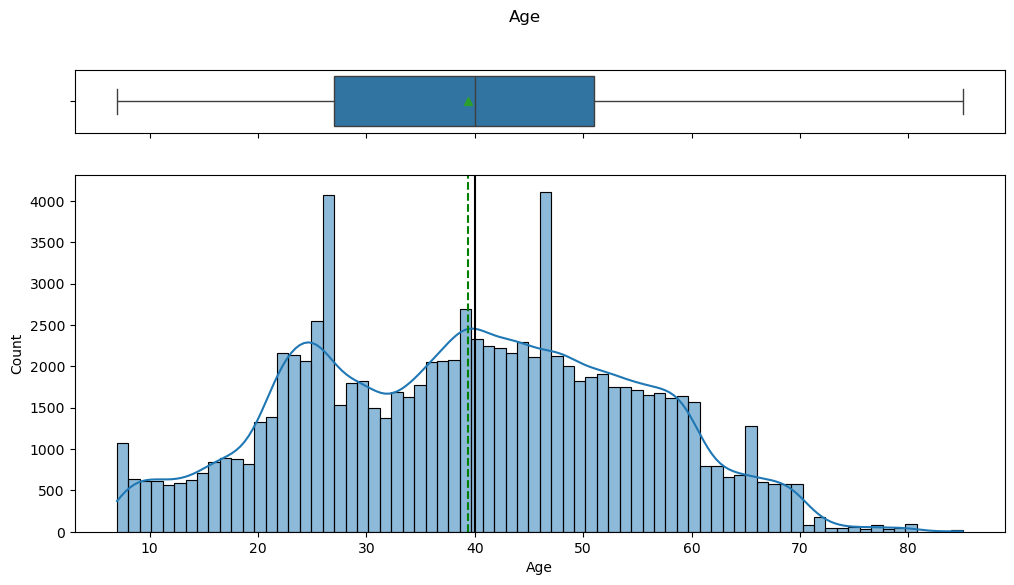

In [14]:
hist_box(data_travel,'Age')

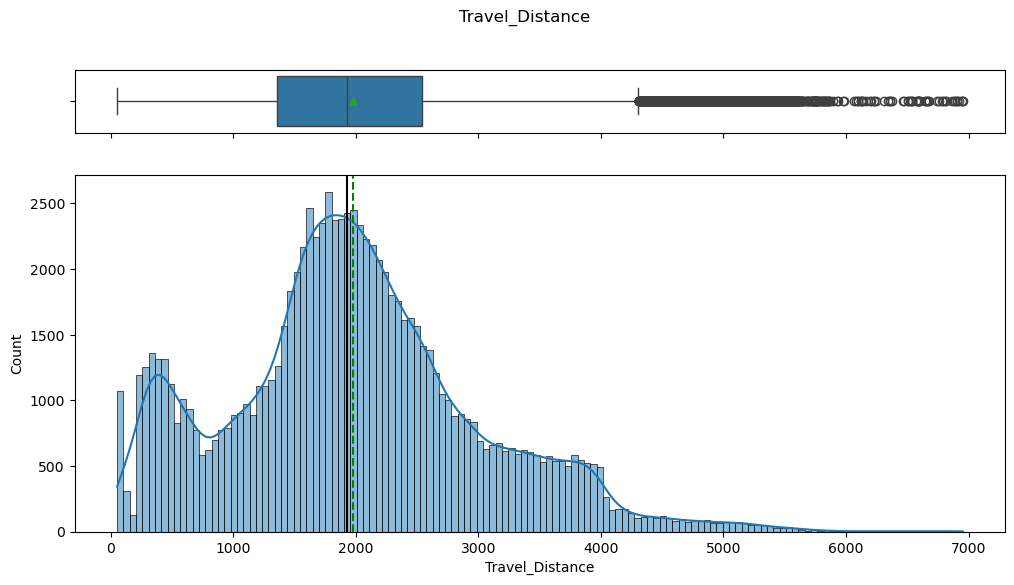

In [15]:
hist_box(data_travel,'Travel_Distance')

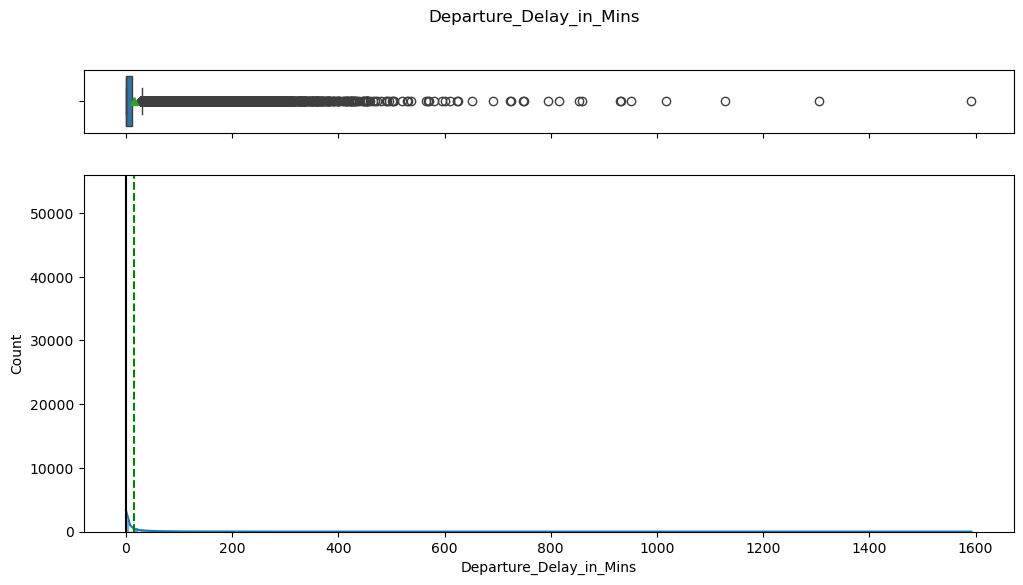

In [16]:
hist_box(data_travel,'Departure_Delay_in_Mins')

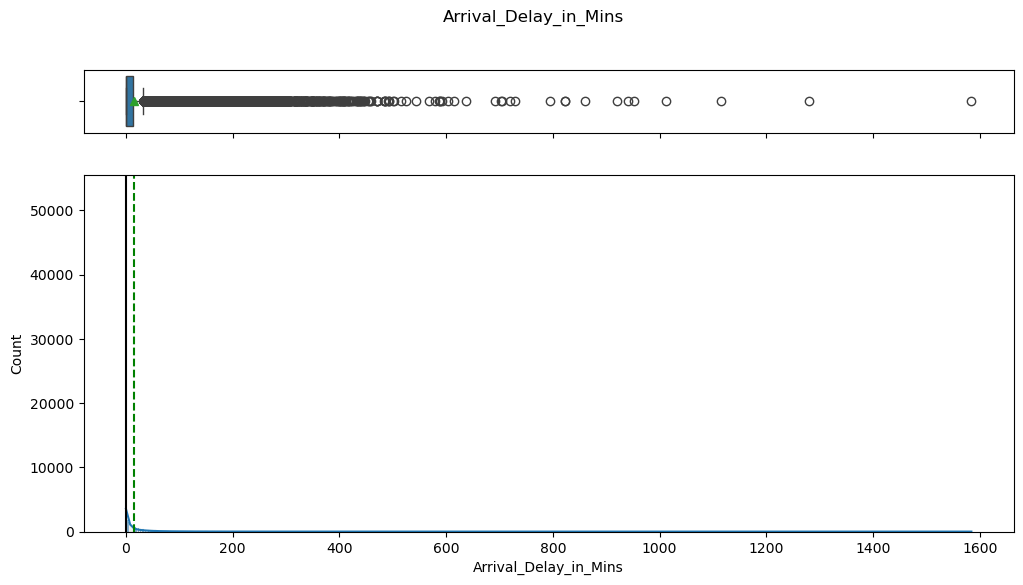

In [17]:
hist_box(data_travel,'Arrival_Delay_in_Mins')

<Axes: xlabel='Customer_Type', ylabel='count'>

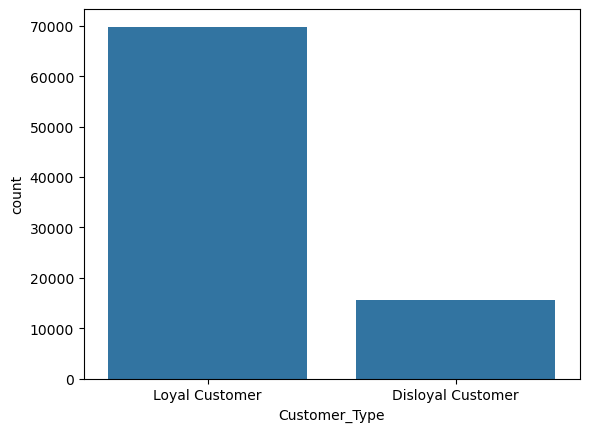

In [18]:
sns.countplot(data = data_travel, x='Customer_Type')

<Axes: xlabel='Type_Travel', ylabel='count'>

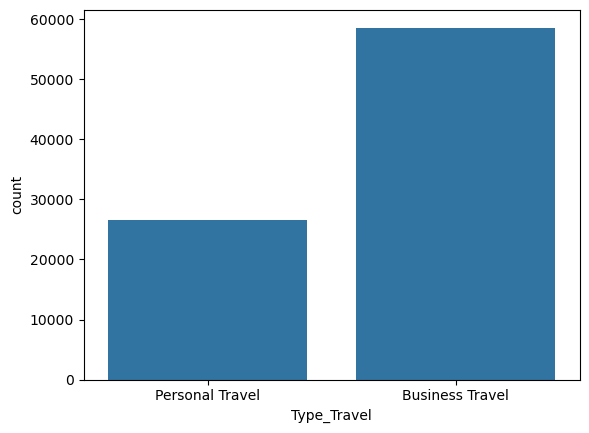

In [19]:
sns.countplot(data = data_travel, x='Type_Travel')

<Axes: xlabel='Travel_Class', ylabel='count'>

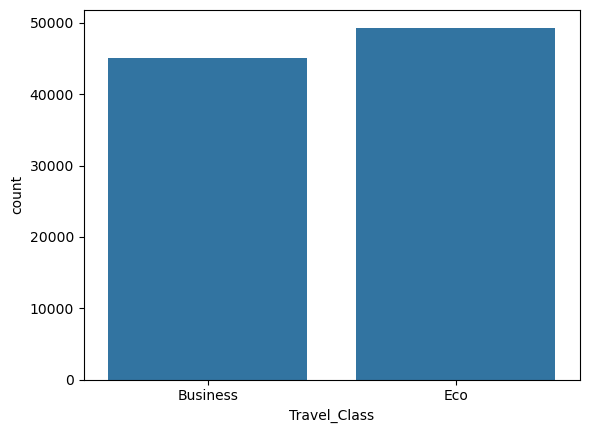

In [20]:
sns.countplot(data = data_travel, x='Travel_Class')

# Survey Data

In [21]:
data_survey = pd.read_csv('Surveydata_train.csv') #Load in data

In [22]:
data_survey.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [23]:
data_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [24]:
data_survey.describe()

,ID,Overall_Experience
count,9.437900e+04,94379.000000
mean,9.884719e+07,0.546658
std,2.724501e+04,0.497821
min,9.880000e+07,0.000000
25%,9.882360e+07,0.000000
50%,9.884719e+07,1.000000
75%,9.887078e+07,1.000000
max,9.889438e+07,1.000000


In [25]:
survey_cat_cols = data_survey.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns

In [26]:
#Print the categories in each categorical column
for column in survey_cat_cols:
    print(data_survey[column].value_counts())
    print('-'*50)

Seat_Comfort
Acceptable           21158
Needs Improvement    20946
Good                 20595
Poor                 15185
Excellent            12971
Extremely Poor        3463
Name: count, dtype: int64
--------------------------------------------------
Seat_Class
Green Car    47435
Ordinary     46944
Name: count, dtype: int64
--------------------------------------------------
Arrival_Time_Convenient
Good                 19574
Excellent            17684
Acceptable           15177
Needs Improvement    14990
Poor                 13692
Extremely Poor        4332
Name: count, dtype: int64
--------------------------------------------------
Catering
Acceptable           18468
Needs Improvement    17978
Good                 17969
Poor                 13858
Excellent            13455
Extremely Poor        3910
Name: count, dtype: int64
--------------------------------------------------
Platform_Location
Manageable           24173
Convenient           21912
Needs Improvement    17832
Inconvenient

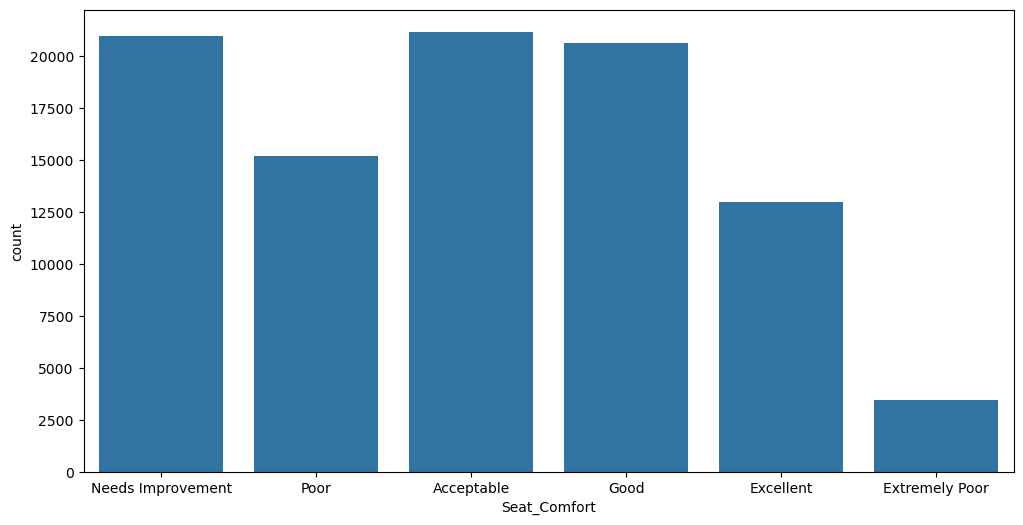

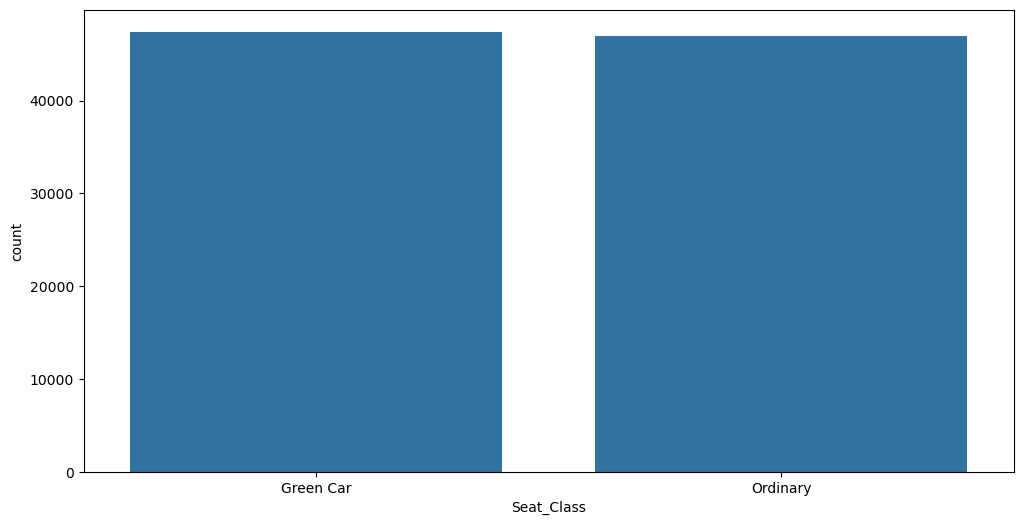

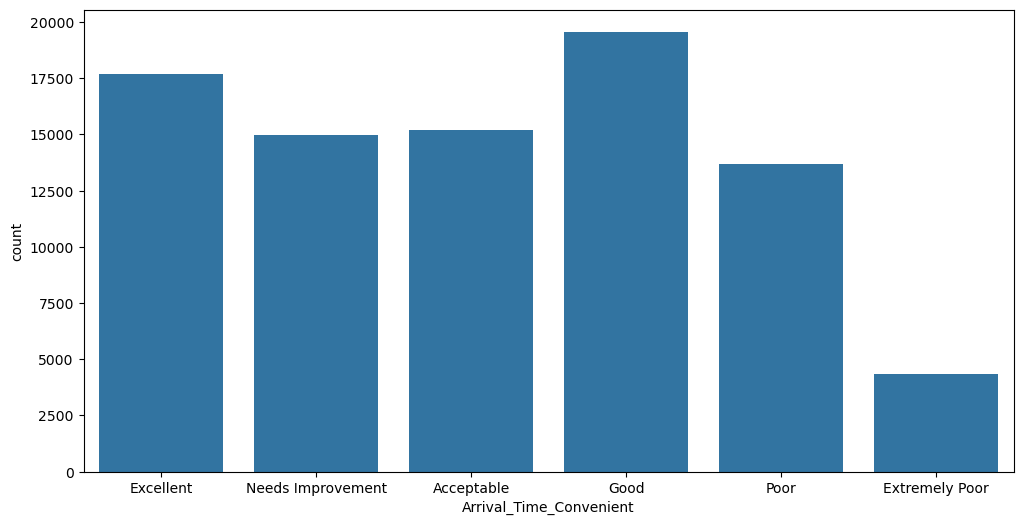

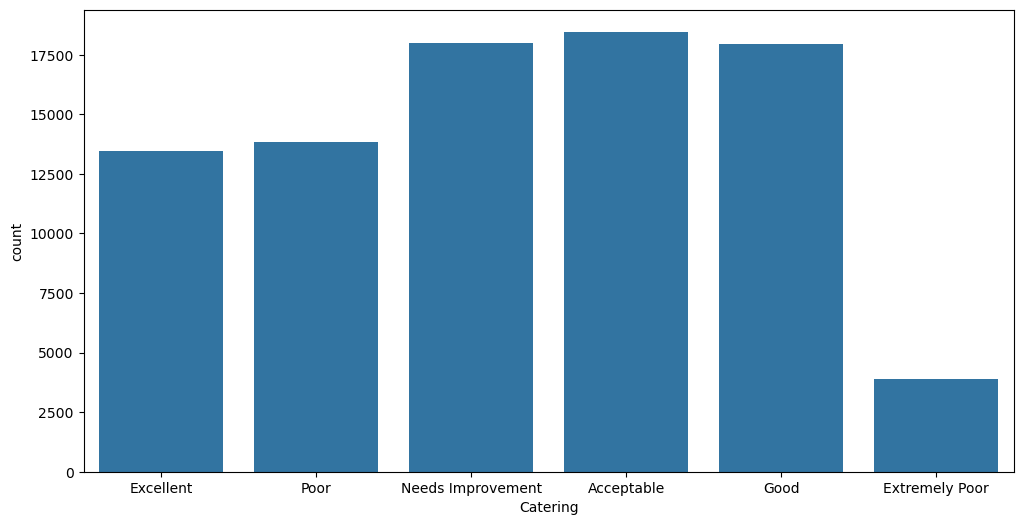

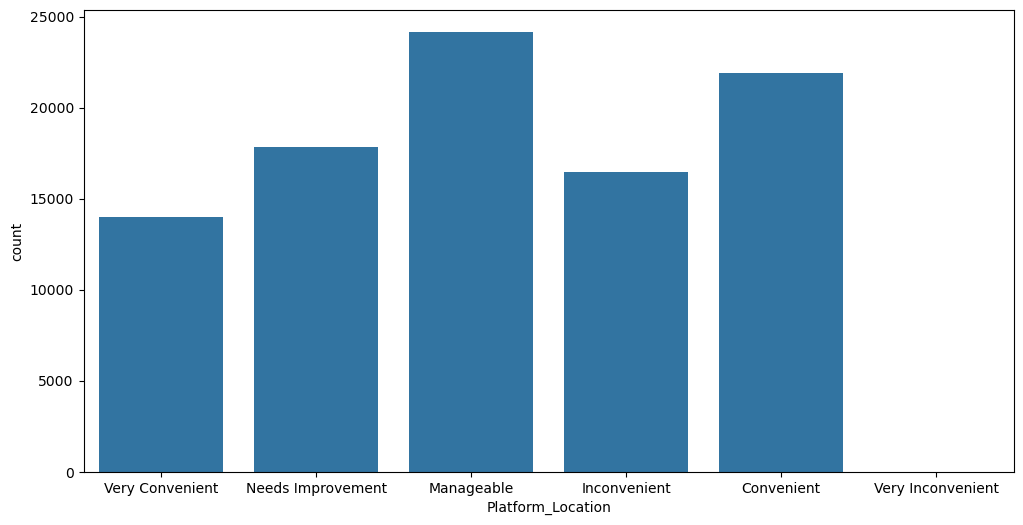

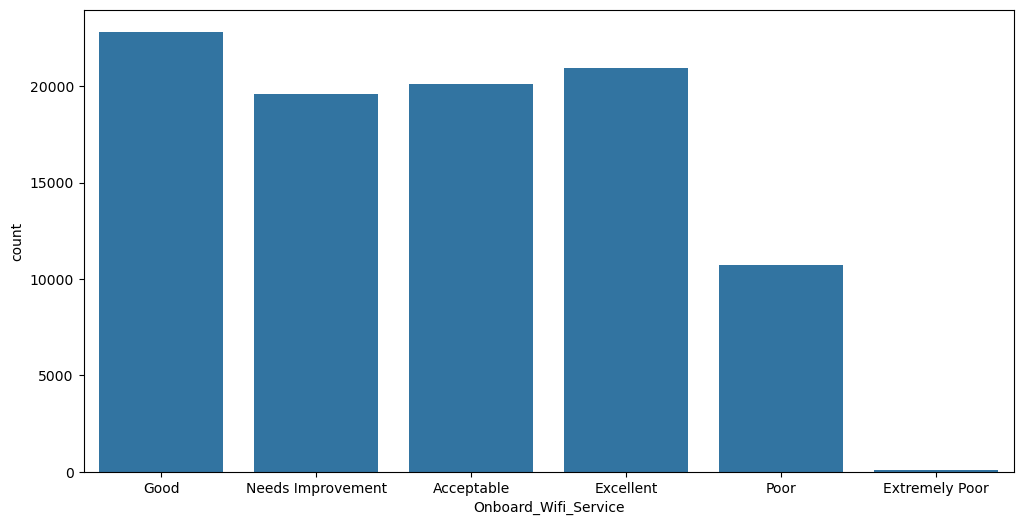

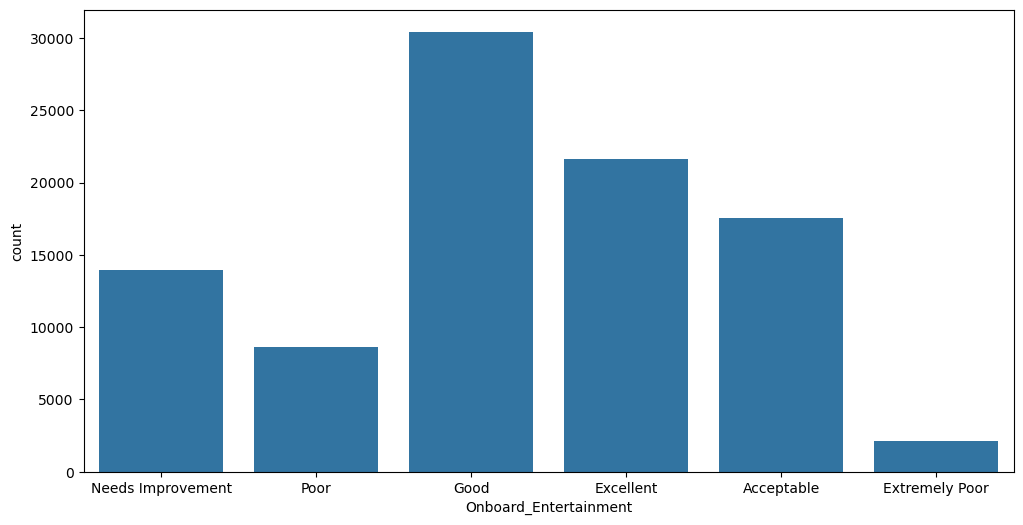

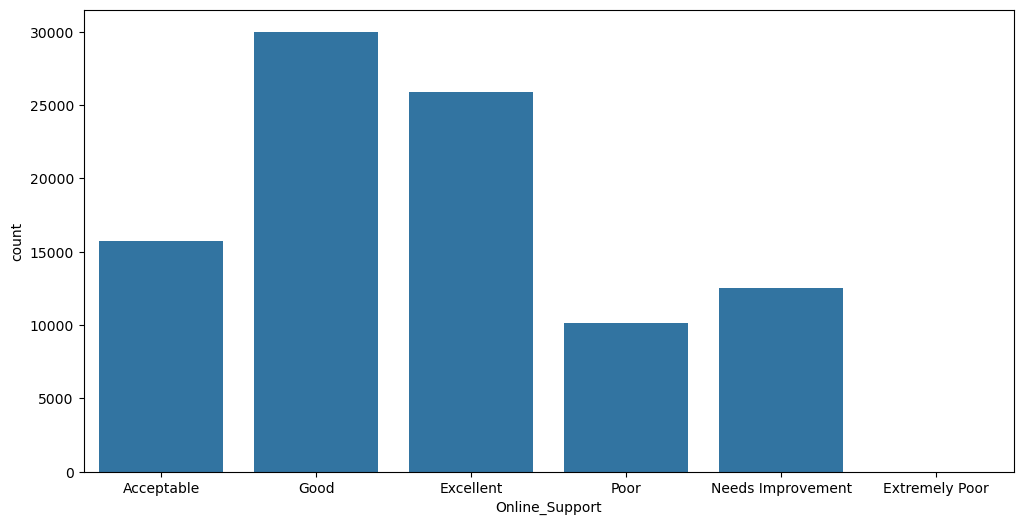

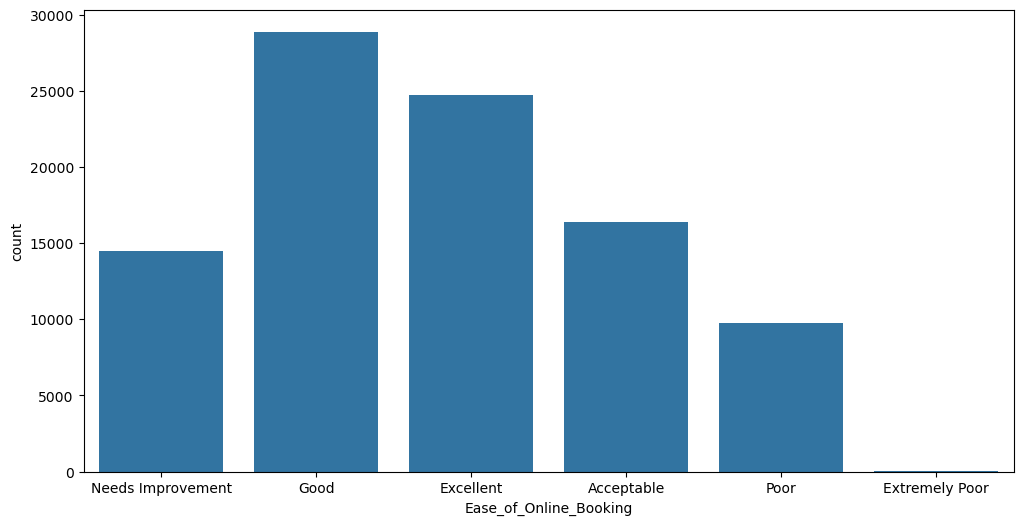

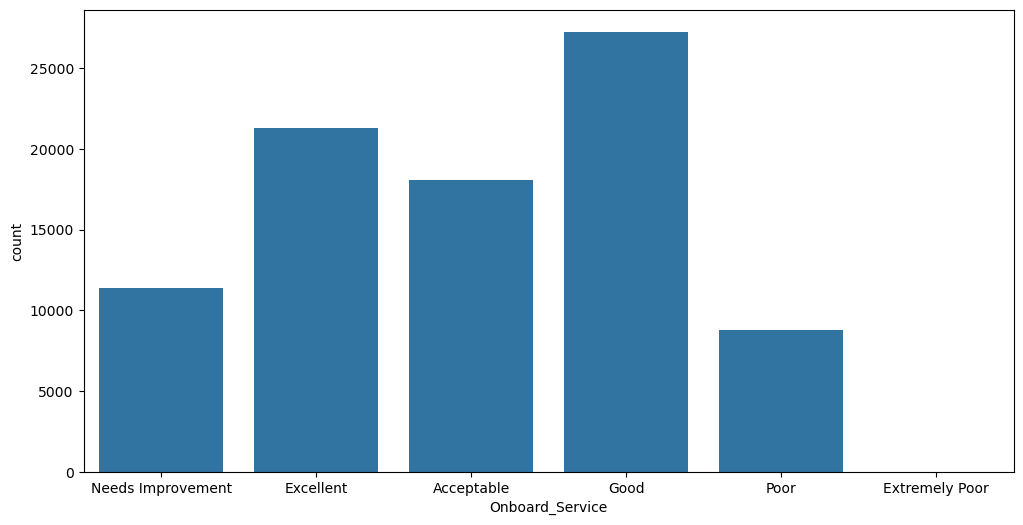

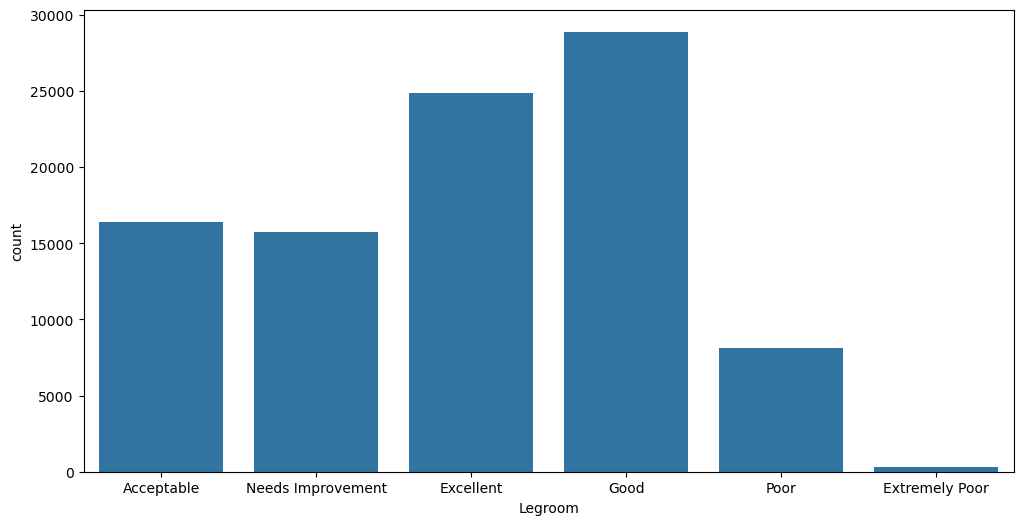

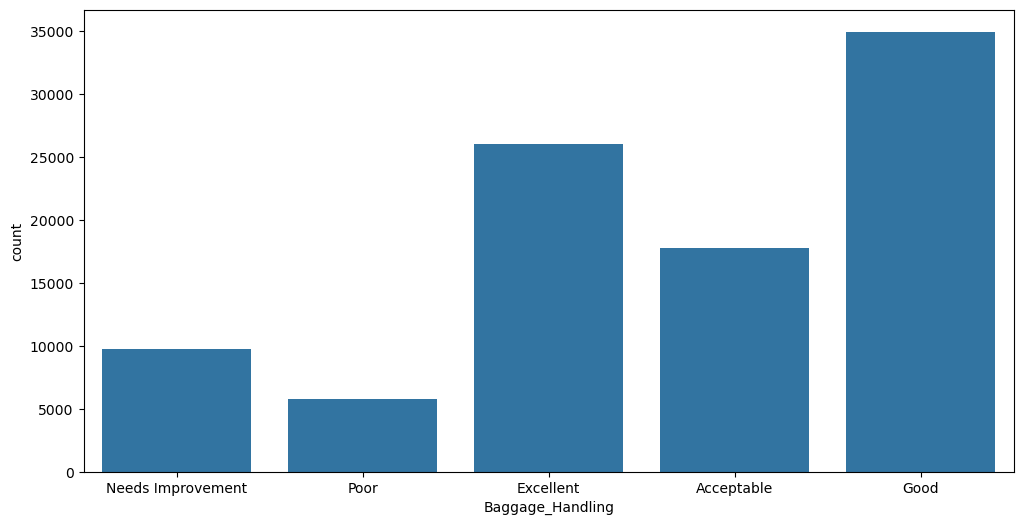

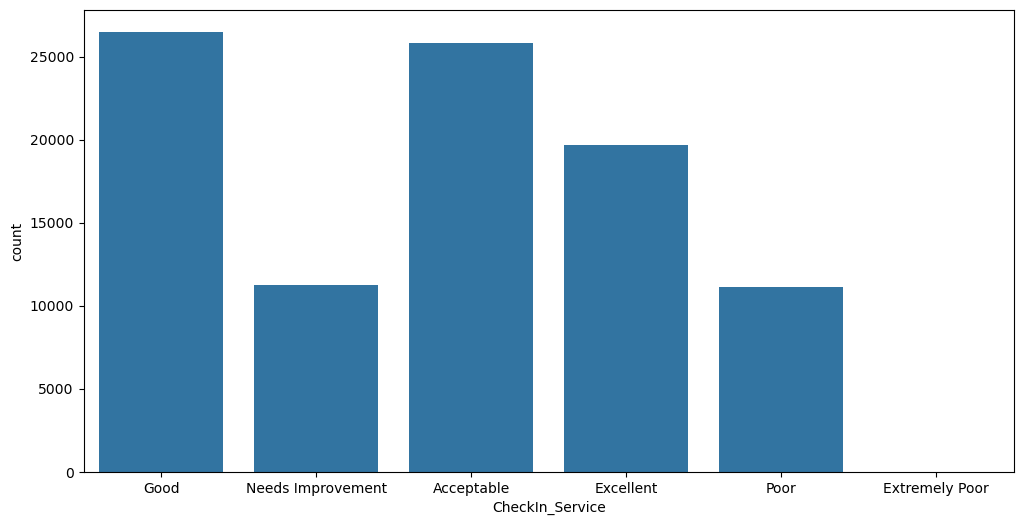

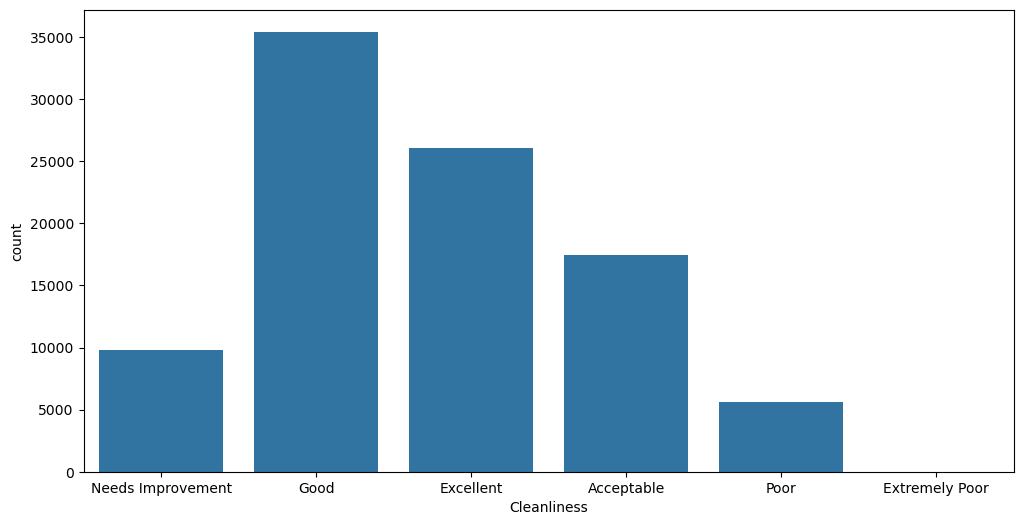

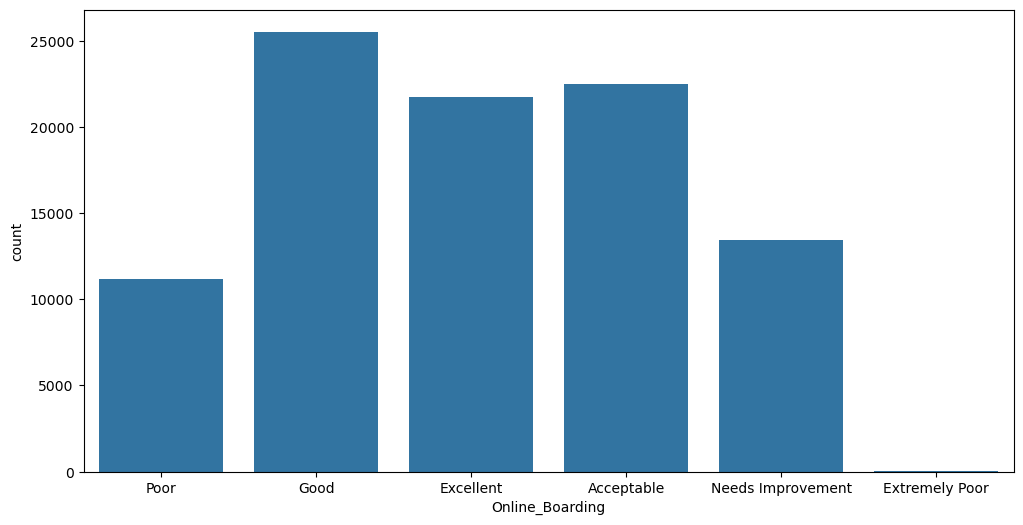

In [27]:
for col in survey_cat_cols:
    plt.figure(figsize=[12, 6])
    sns.countplot(data = data_survey, x=col)
    plt.show()

# Data Preparation

In [28]:
data_satisfaction = data_travel.copy()

In [29]:
data_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [30]:
data_satisfaction = data_satisfaction.merge(data_survey,how='inner', on = 'ID') #Merge the two datasets into a single dataset

In [31]:
data_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [32]:
satisfaction_cat_cols = data_satisfaction.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
satisfaction_num_cols = data_satisfaction.select_dtypes(include = ['int64','float64']).columns.tolist() #List out numerical columns

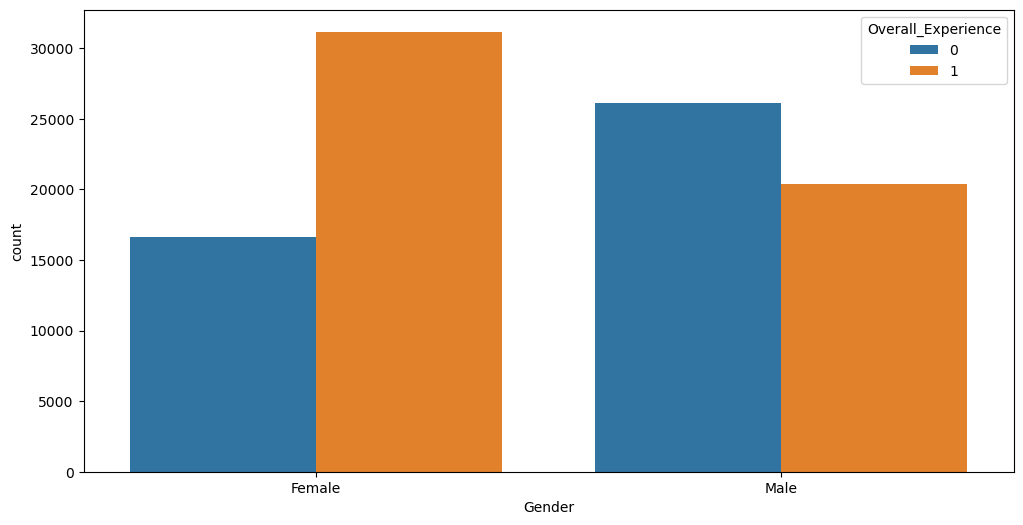

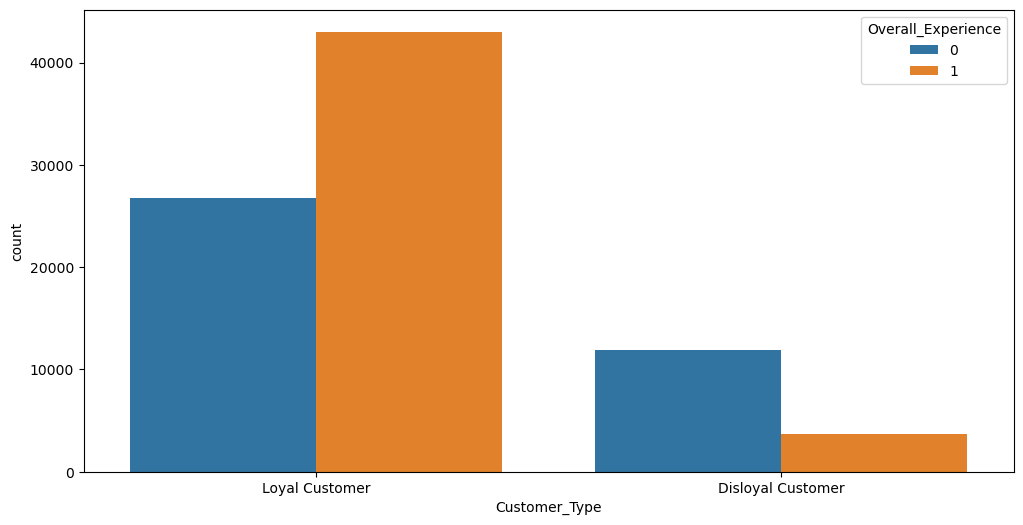

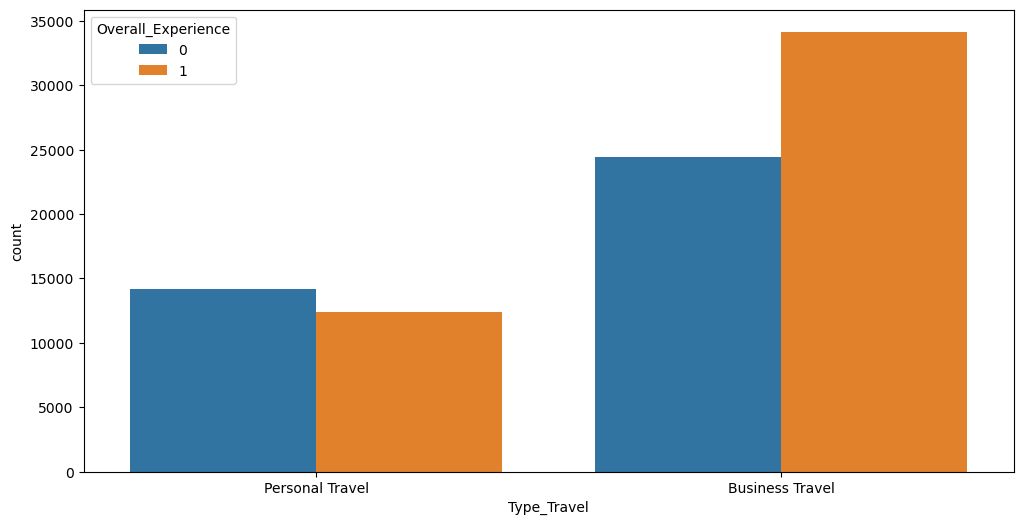

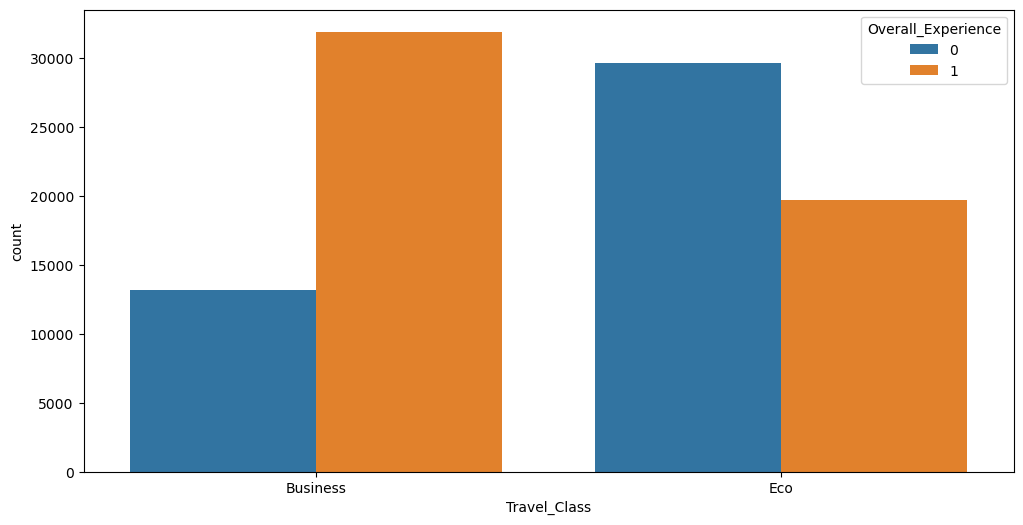

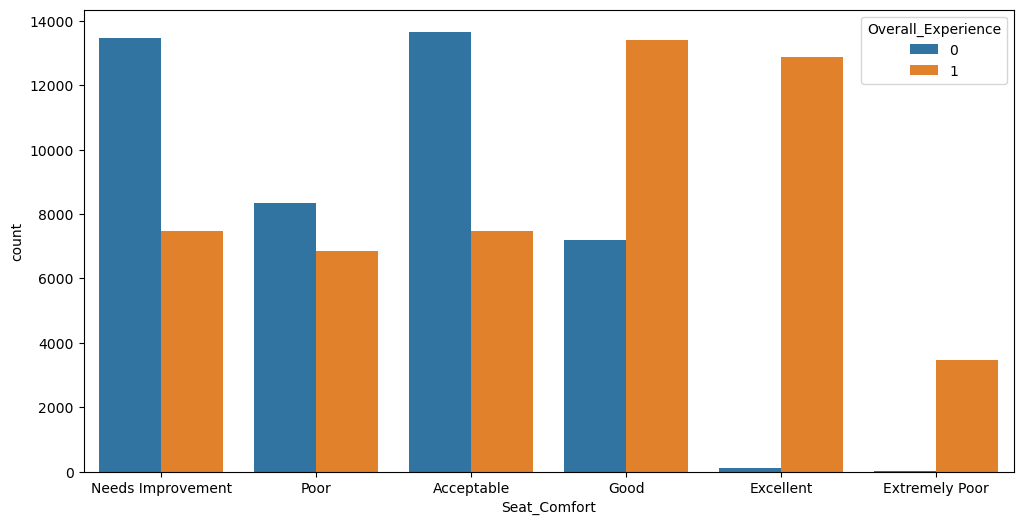

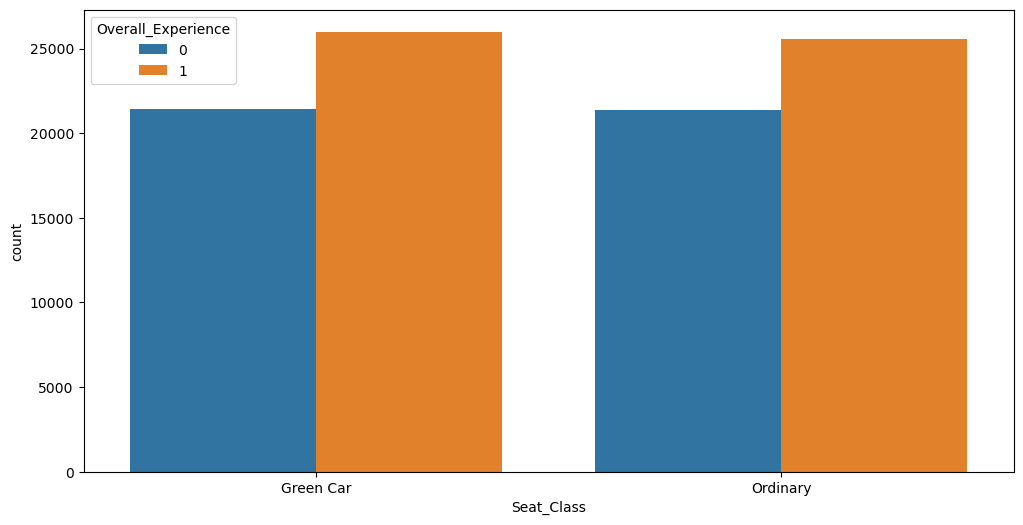

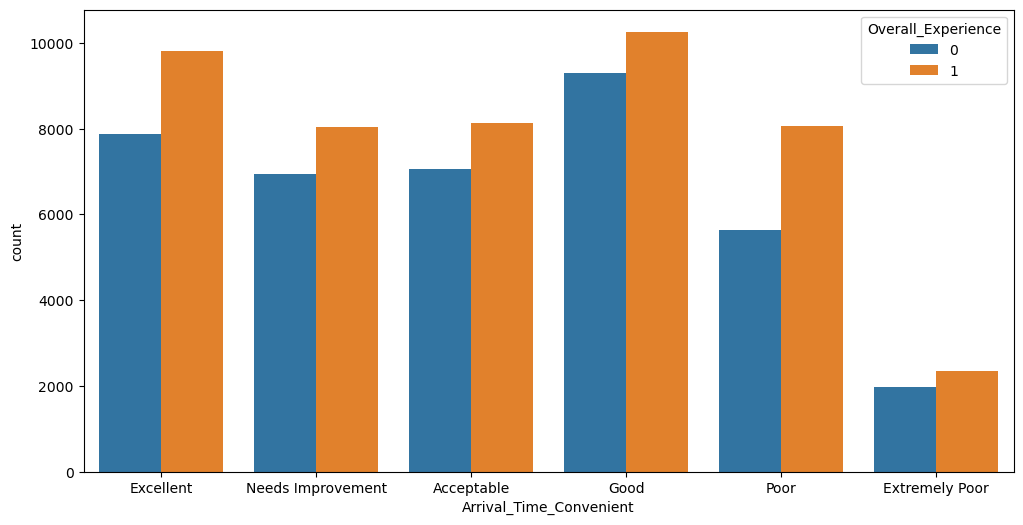

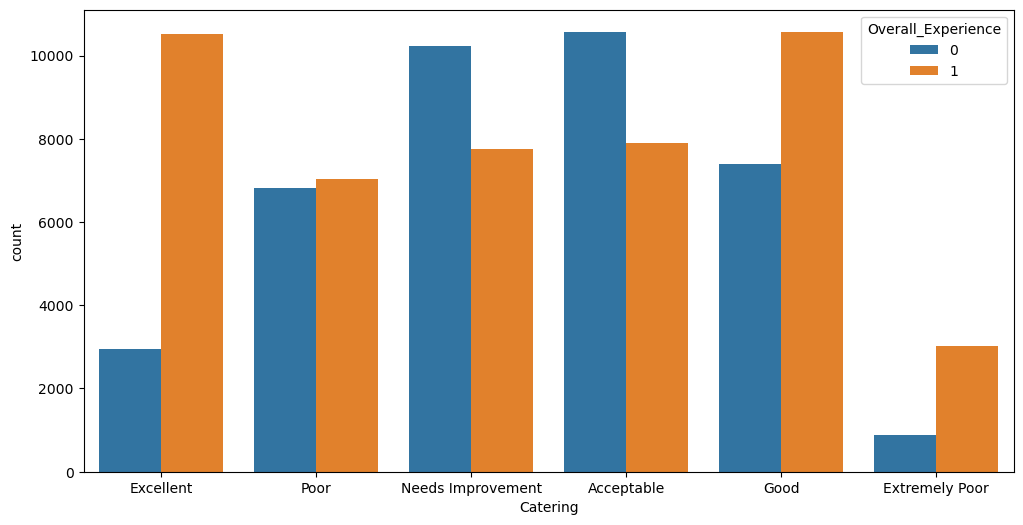

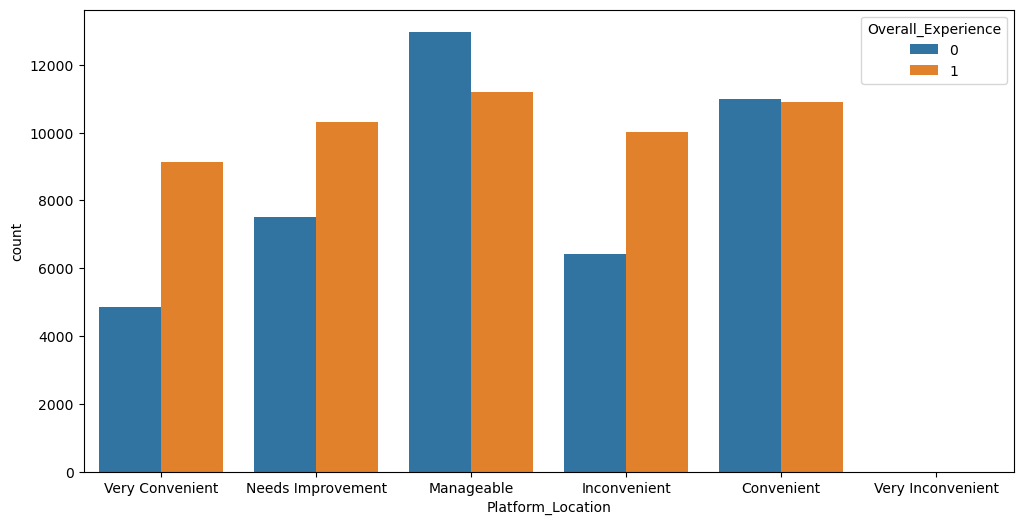

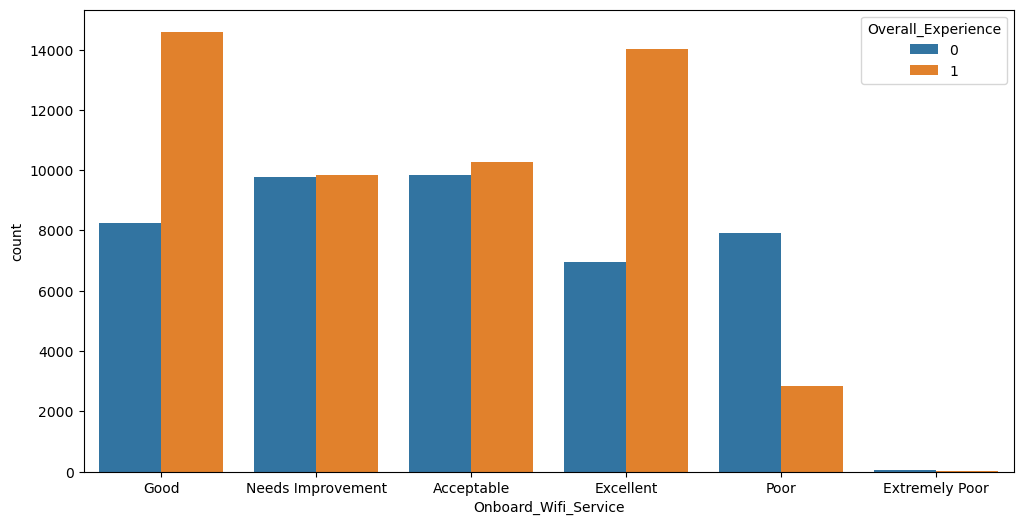

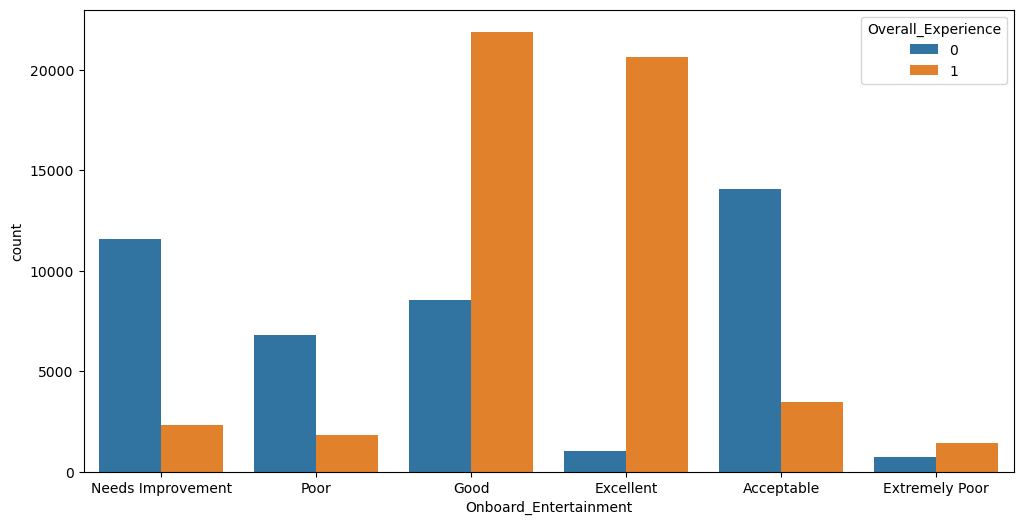

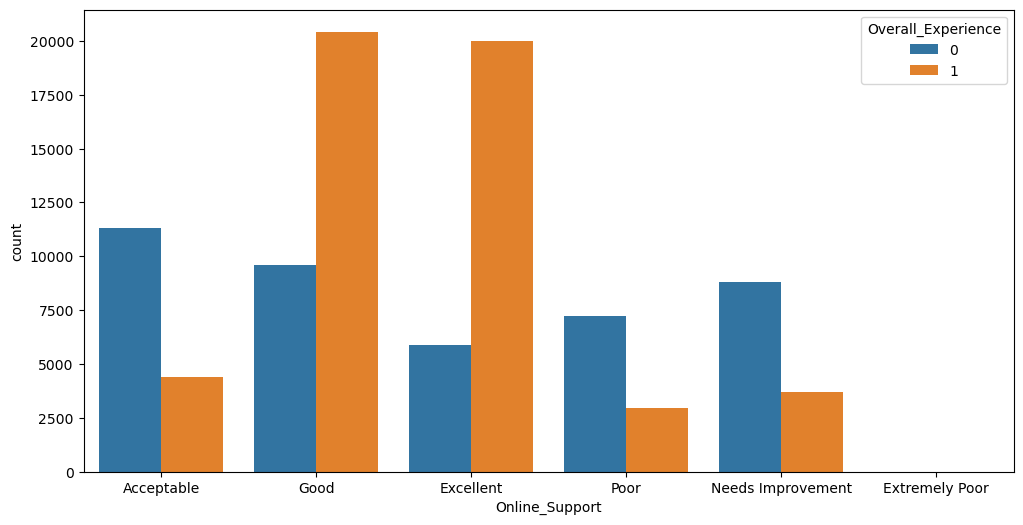

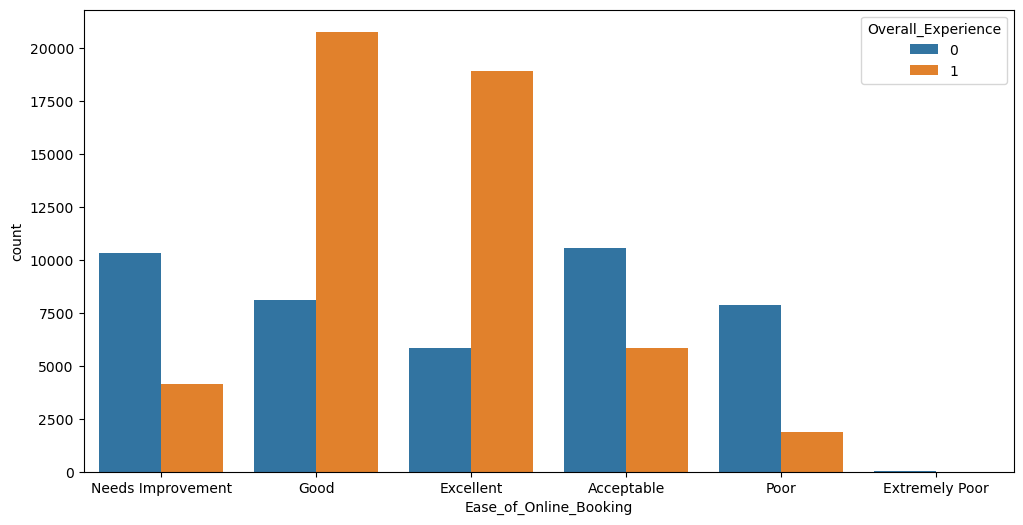

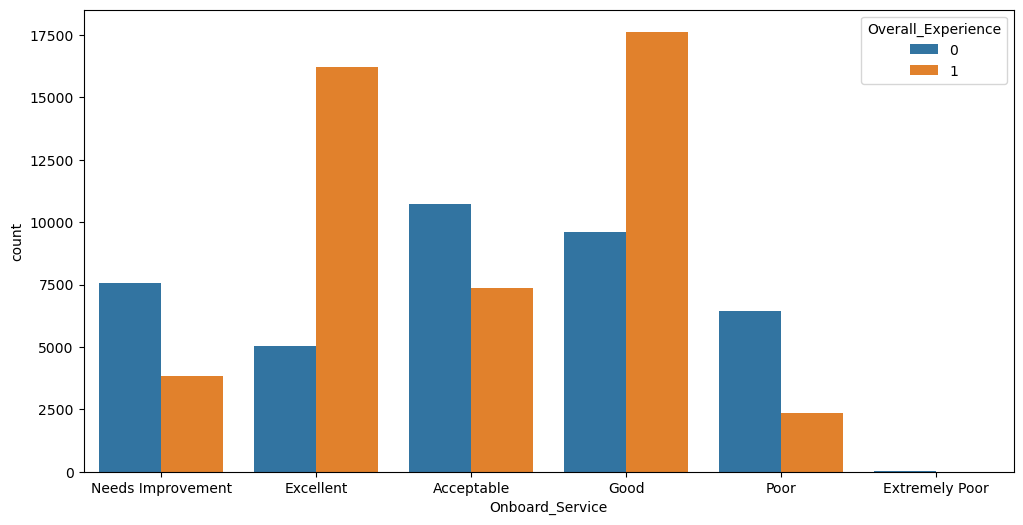

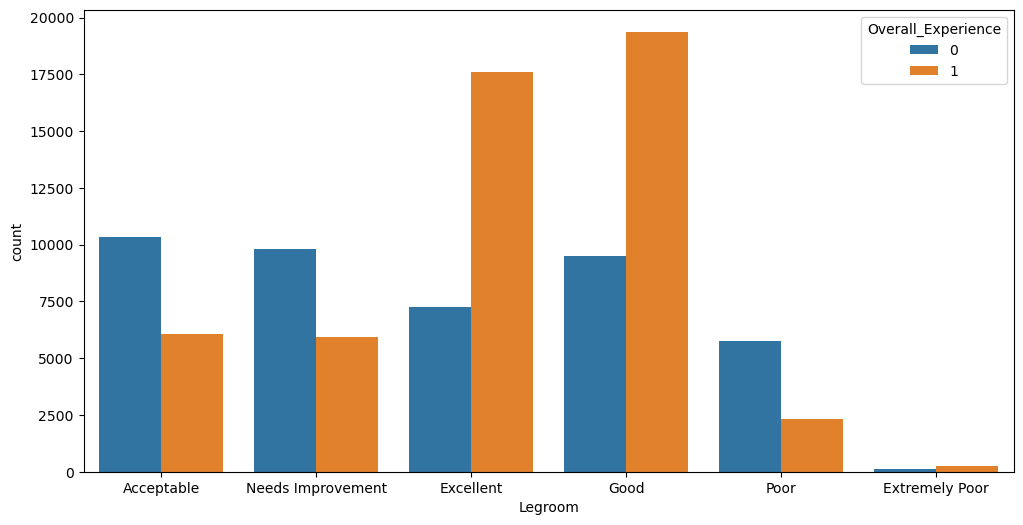

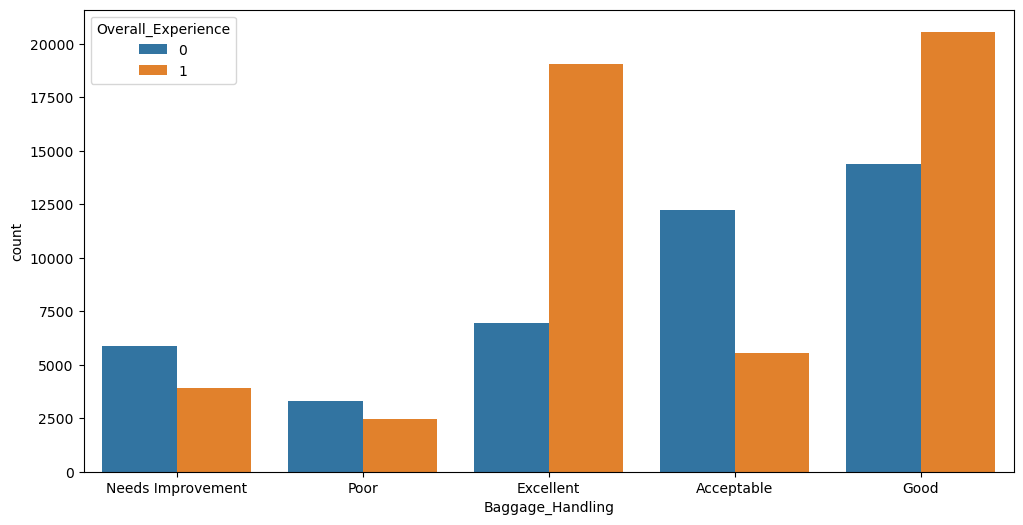

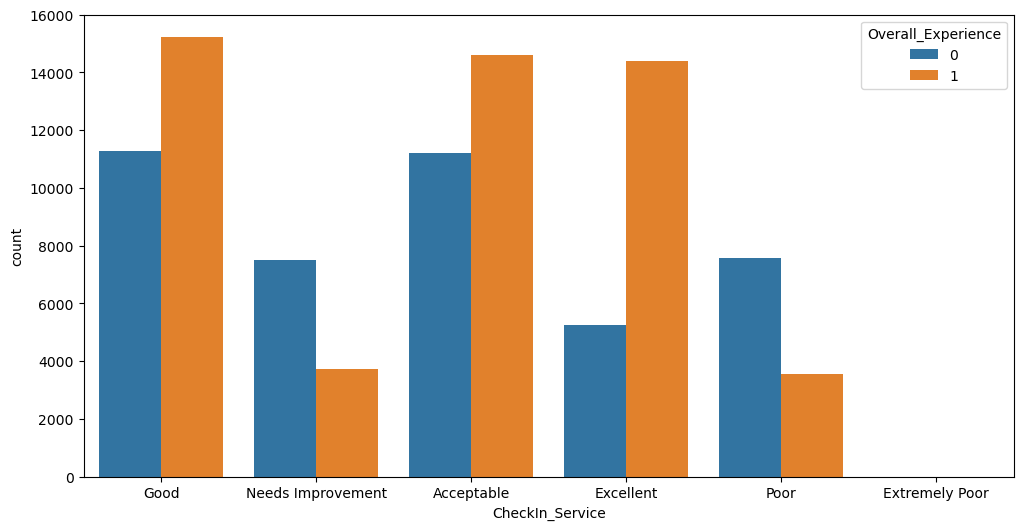

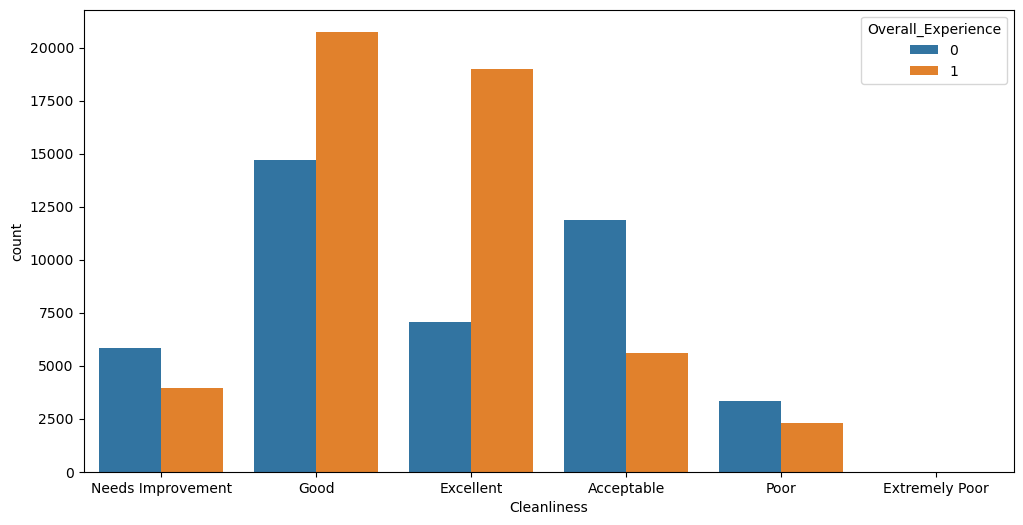

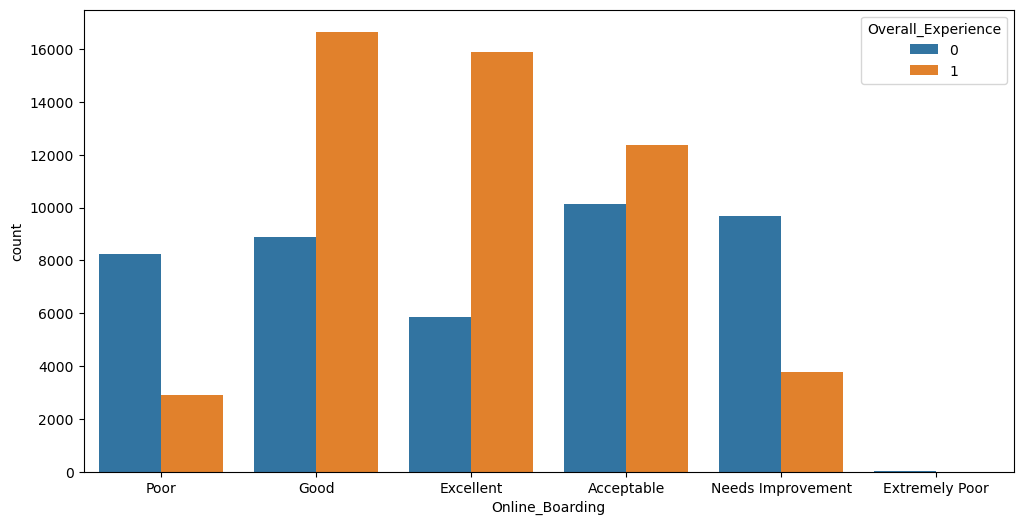

In [33]:
#Data analysis for confirmation
for col in satisfaction_cat_cols:
    plt.figure(figsize=[12, 6])
    #stacked_barplot(data, 'Overall_Experience', col)
    sns.countplot(data = data_satisfaction, x=col, hue='Overall_Experience')
    plt.show()

## Missing Data

In [34]:
data = data_satisfaction.copy()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [36]:
data.drop('ID', axis = 1, inplace=True) #ID is not relevant to prediction
Y = data['Overall_Experience'] #Target variable
X = data.drop('Overall_Experience', axis = 1) #Features variable

In [37]:
null_num_cols = X.select_dtypes(include = ['int64','float64']).columns.tolist() #List out numerical columns
null_num_cols.remove('Travel_Distance') #Drop non-null column
null_cat_cols = X.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
null_cat_cols.remove('Travel_Class') #Drop non-null column
null_cat_cols.remove('Seat_Class') #Drop non-null column

In [38]:
MissingVal_AvgImputer = SimpleImputer(strategy='mean') #Fill missing values with mean for numerical columns
X[null_num_cols] = MissingVal_AvgImputer.fit_transform(X[null_num_cols])

In [39]:
MissingVal_FreqImputer = SimpleImputer(strategy='most_frequent') #Fill missing values with mode for categorical columns
X[null_cat_cols] = MissingVal_FreqImputer.fit_transform(X[null_cat_cols])

In [40]:
X = X.reset_index(drop=True)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94379 non-null  object 
 1   Customer_Type            94379 non-null  object 
 2   Age                      94379 non-null  float64
 3   Type_Travel              94379 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94379 non-null  float64
 7   Arrival_Delay_in_Mins    94379 non-null  float64
 8   Seat_Comfort             94379 non-null  object 
 9   Seat_Class               94379 non-null  object 
 10  Arrival_Time_Convenient  94379 non-null  object 
 11  Catering                 94379 non-null  object 
 12  Platform_Location        94379 non-null  object 
 13  Onboard_Wifi_Service     94379 non-null  object 
 14  Onboard_Entertainment 

In [43]:
cat_cols = X.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
#Initialize OneHotEncoder
X_LabelEncoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = X_LabelEncoder.fit_transform(X[cat_cols])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_encode_X = pd.DataFrame(one_hot_encoded, columns=X_LabelEncoder.get_feature_names_out(cat_cols))

# Concatenate the one-hot encoded dataframe with the original dataframe
Xe = pd.concat([X, one_hot_encode_X], axis=1)

# Drop the original categorical columns
Xe = Xe.drop(cat_cols, axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xe,Y, test_size = 0.2, random_state = 42)

# Decision Trees

In [45]:
DT_Predictor = DecisionTreeClassifier(random_state=42)
DT_Predictor.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

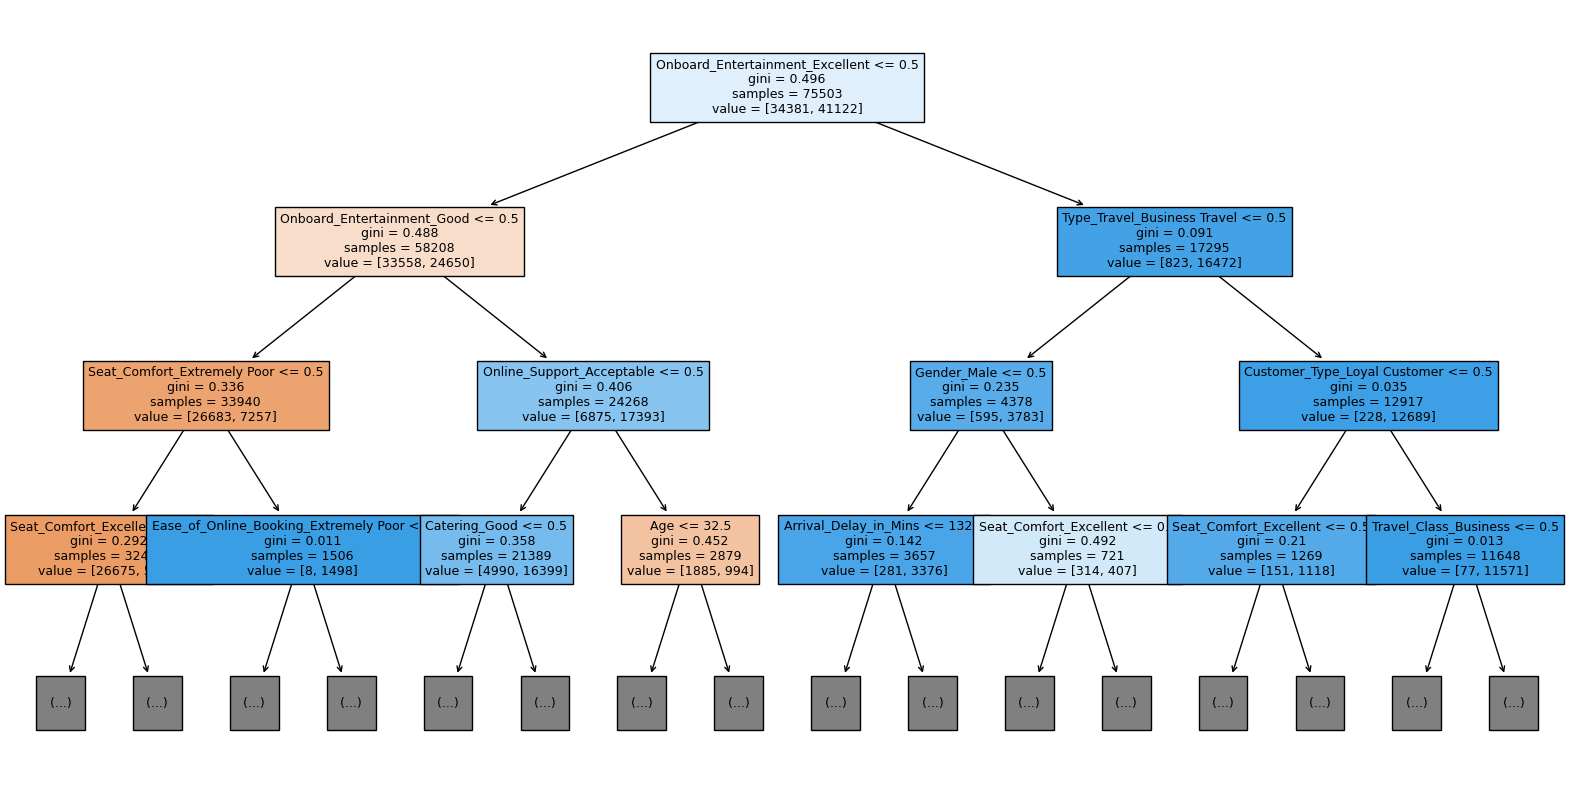

In [46]:
DecisionTree_Visualizer(X_train,DT_Predictor,depth = 3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



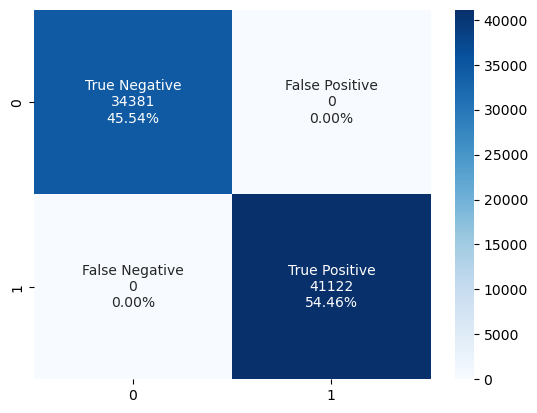

In [47]:
#Checking the performance of the decision tree to training data
OverallExp_Train_DT_Predict = DT_Predictor.predict(X_train)
make_confusion_matrix(y_train, OverallExp_Train_DT_Predict)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8405
           1       0.93      0.94      0.94     10471

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



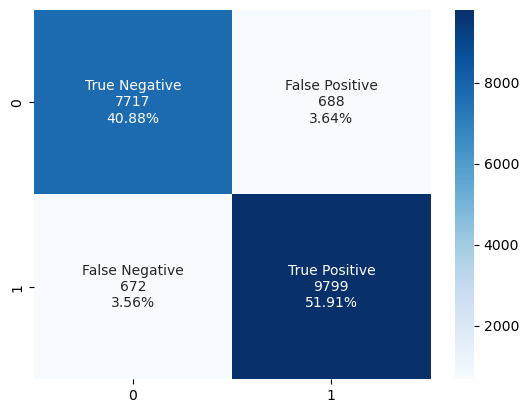

In [48]:
#Checking the performance of the decision tree to test data
OverallExp_Test_DT_Predict = DT_Predictor.predict(X_test)
make_confusion_matrix(y_test, OverallExp_Test_DT_Predict)

In [49]:
DT_Predictor_Tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,40,5), #Original tree has a depth of 40
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 20, 30, 50, 70],
}
# Run the grid search
grid_obj_DT = GridSearchCV(DT_Predictor_Tuned, parameters, cv=5,scoring='accuracy',n_jobs=-1)
grid_obj_DT = grid_obj_DT.fit(X_train, y_train)

# Set the tree to the best combination of parameters
DT_Predictor_Tuned = grid_obj_DT.best_estimator_

# Fit the best tree to the data.
DT_Predictor_Tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, max_leaf_nodes=250, min_samples_split=30,
                       random_state=42)

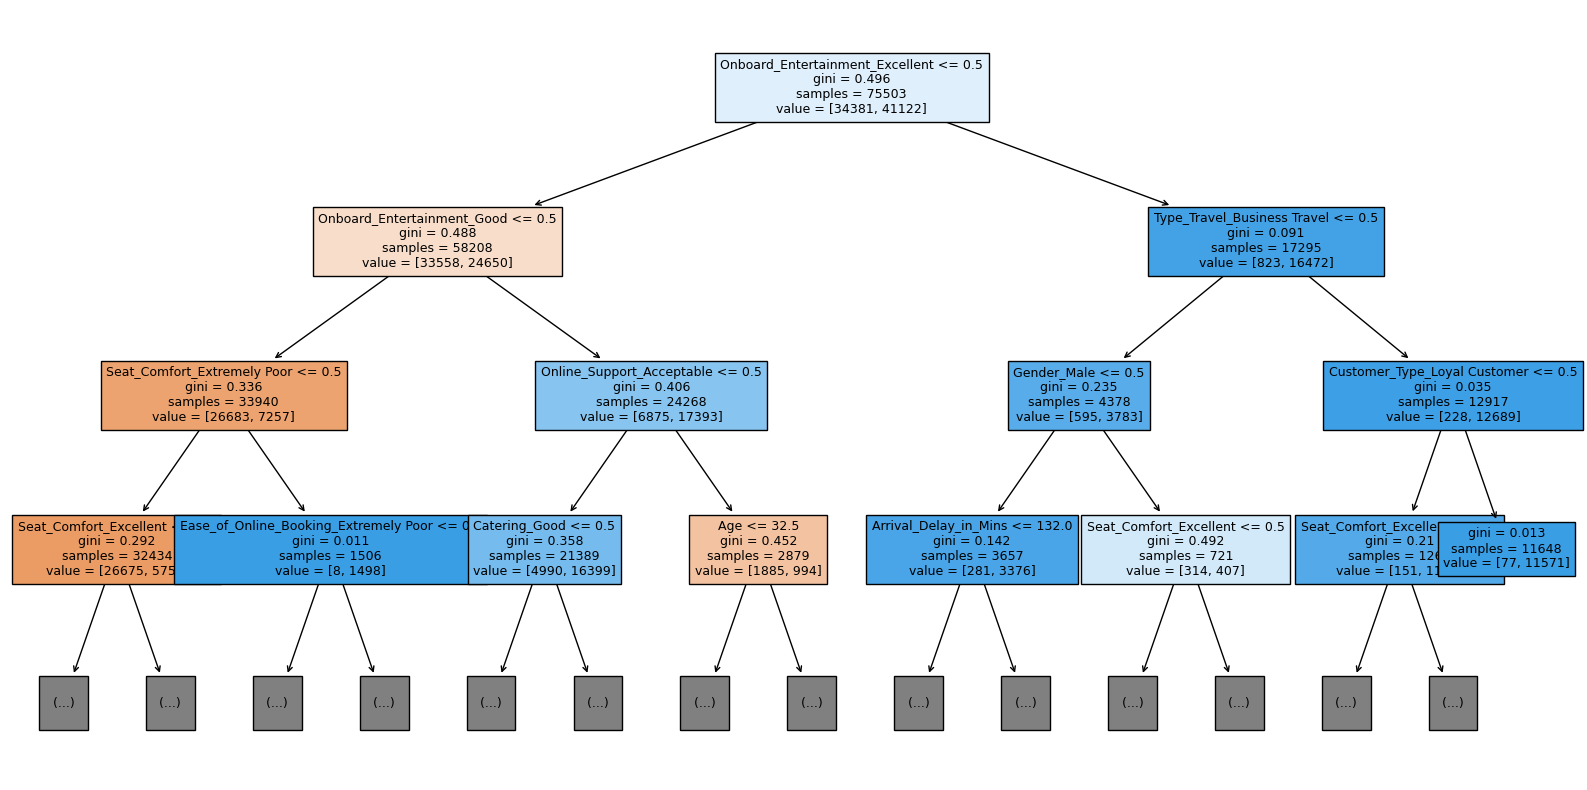

In [50]:
DecisionTree_Visualizer(X_train,DT_Predictor_Tuned,depth = 3)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     34381
           1       0.96      0.93      0.95     41122

    accuracy                           0.94     75503
   macro avg       0.94      0.94      0.94     75503
weighted avg       0.94      0.94      0.94     75503



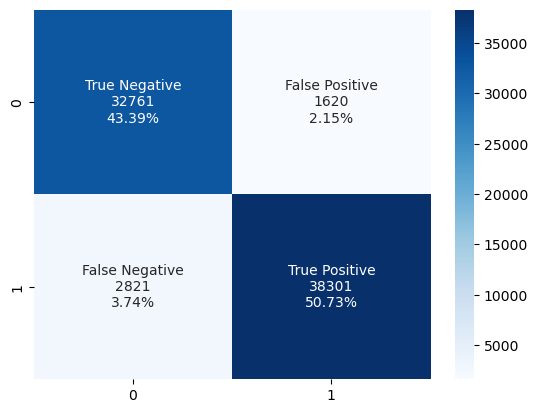

In [51]:
#Checking the performance of the tuned decision tree to training data
OverallExp_Train_DTT_Predict = DT_Predictor_Tuned.predict(X_train)
make_confusion_matrix(y_train, OverallExp_Train_DTT_Predict)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      8405
           1       0.95      0.93      0.94     10471

    accuracy                           0.93     18876
   macro avg       0.93      0.94      0.93     18876
weighted avg       0.94      0.93      0.93     18876



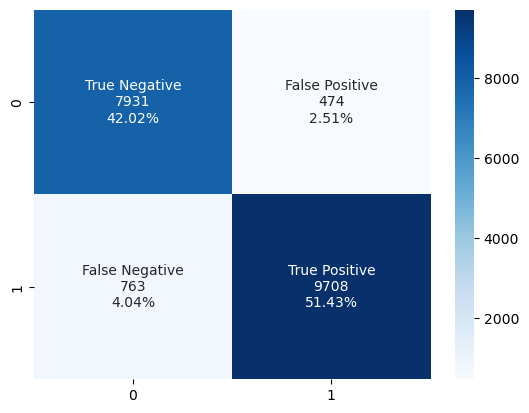

In [52]:
#Checking the performance of the tuned decision tree to test data
OverallExp_Test_DTT_Predict = DT_Predictor_Tuned.predict(X_test)
make_confusion_matrix(y_test, OverallExp_Test_DTT_Predict)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

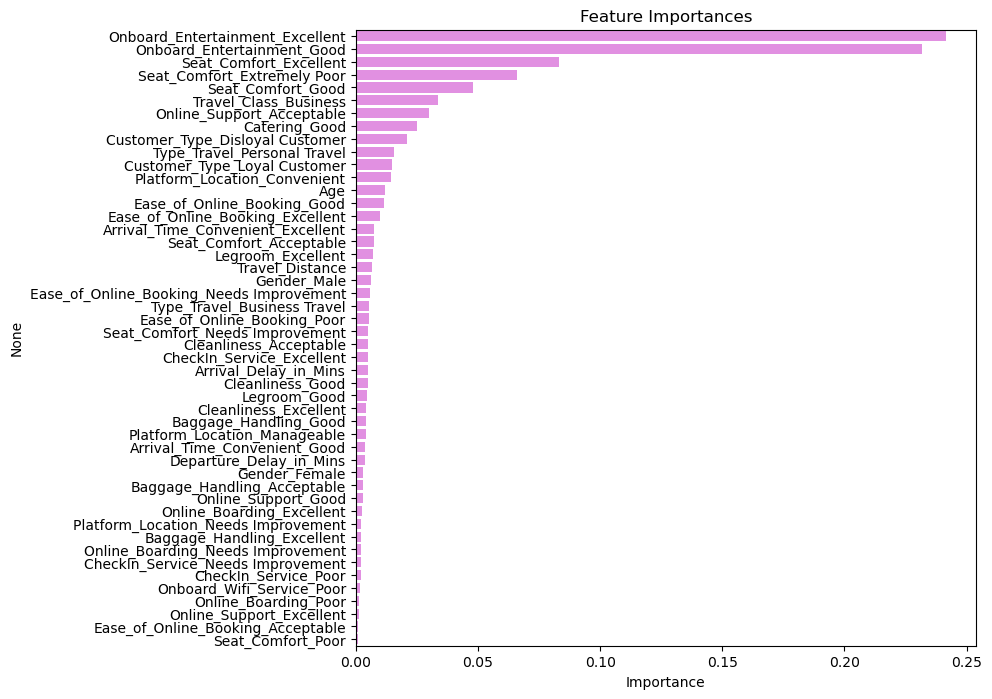

In [53]:
#List out the features on which the tree splits and their importances
importances = DT_Predictor_Tuned.feature_importances_

columns = X_train.columns

importance_DT = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_DT[importance_DT['Importance']>0.001].Importance, y = importance_DT[importance_DT['Importance']>0.001].index, color="violet")

# Random Forest Classifier

In [54]:
RF_Predictor = RandomForestClassifier(random_state=42)
RF_Predictor.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34381
           1       1.00      1.00      1.00     41122

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503



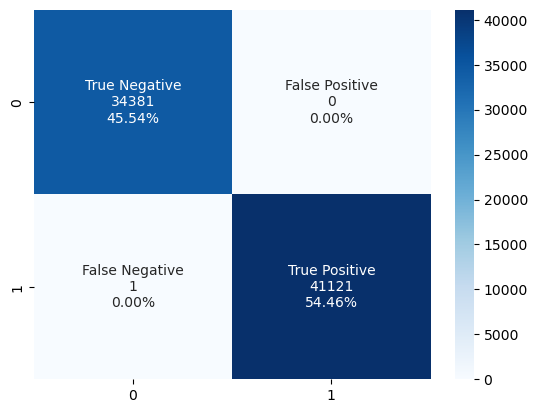

In [55]:
#Checking the performance of the random forest to training data
OverallExp_Train_RF_Predict = RF_Predictor.predict(X_train)
make_confusion_matrix(y_train, OverallExp_Train_RF_Predict)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



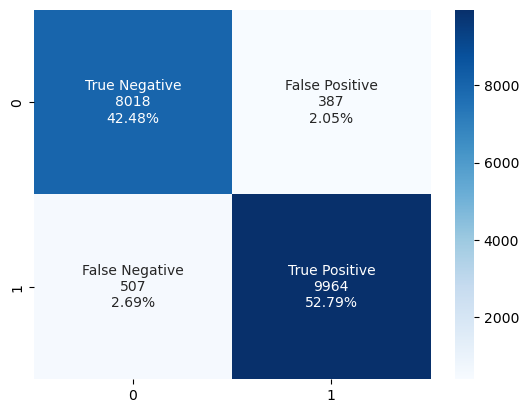

In [56]:
#Checking the performance of the random forest to test data
OverallExp_Test_RF_Predict = RF_Predictor.predict(X_test)
make_confusion_matrix(y_test, OverallExp_Test_RF_Predict)

In [57]:
RF_Predictor_Tuned = RandomForestClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,40,5), #Original tree has a depth of 40
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 20, 30, 50, 70],
}
# Run the grid search
grid_obj_RF = GridSearchCV(RF_Predictor_Tuned, parameters, cv=5,scoring='accuracy',n_jobs=-1)
grid_obj_RF = grid_obj_RF.fit(X_train, y_train)

# Set the tree to the best combination of parameters
RF_Predictor_Tuned = grid_obj_RF.best_estimator_

# Fit the best tree to the data.
RF_Predictor_Tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=31, max_leaf_nodes=250, min_samples_split=50,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     34381
           1       0.94      0.94      0.94     41122

    accuracy                           0.93     75503
   macro avg       0.93      0.93      0.93     75503
weighted avg       0.93      0.93      0.93     75503



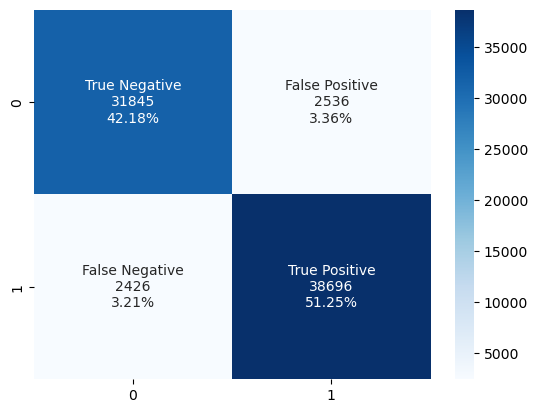

In [58]:
#Checking the performance of the tune random forest to training data
OverallExp_Train_RFT_Predict = RF_Predictor_Tuned.predict(X_train)
make_confusion_matrix(y_train, OverallExp_Train_RFT_Predict)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8405
           1       0.94      0.94      0.94     10471

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



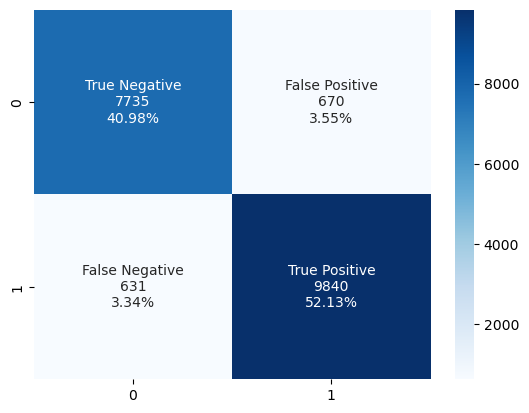

In [59]:
#Checking the performance of the tuned random forest to test data
OverallExp_Test_RFT_Predict = RF_Predictor_Tuned.predict(X_test)
make_confusion_matrix(y_test, OverallExp_Test_RFT_Predict)

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance', ylabel='None'>

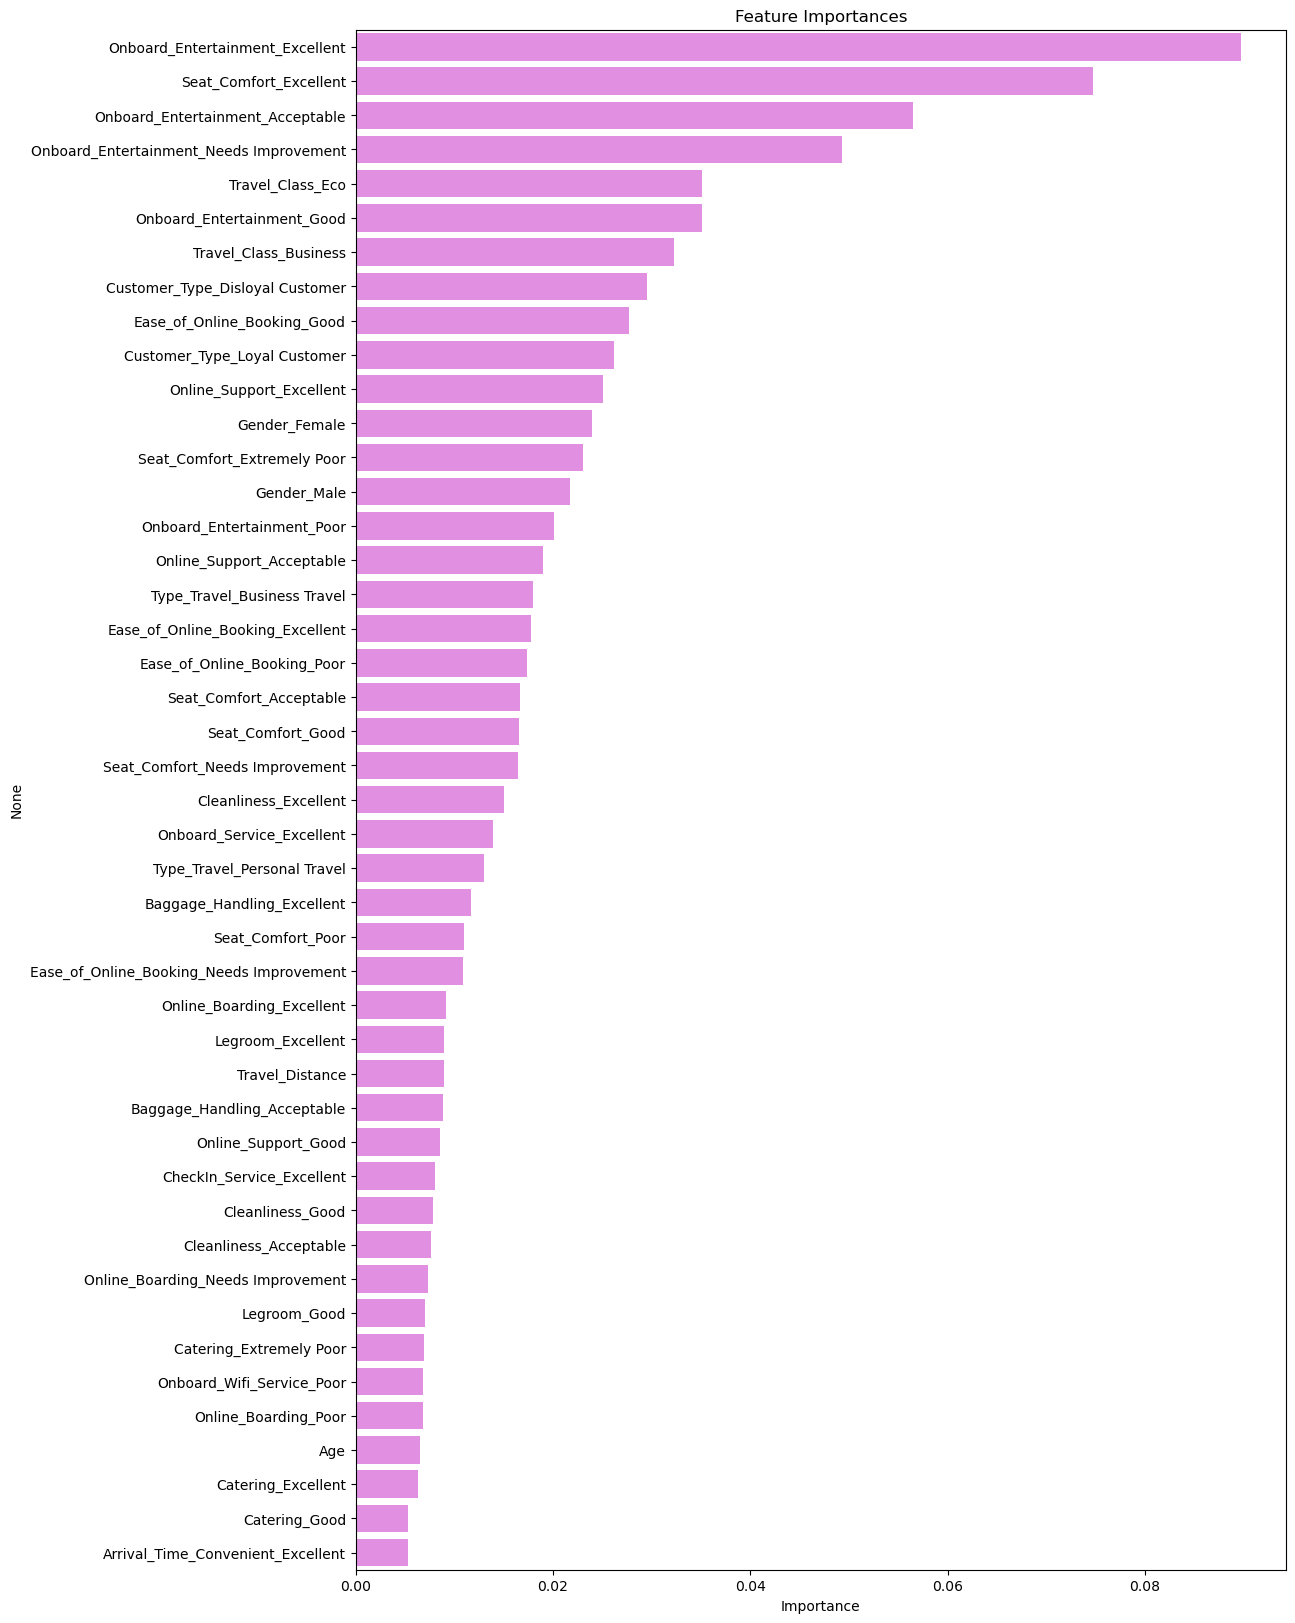

In [60]:
#List out the features on which the tree splits and their importances
importances = RF_Predictor_Tuned.feature_importances_

columns = X_train.columns

importance_RF = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(12, 20))
plt.title("Feature Importances")
sns.barplot(x = importance_RF[importance_RF['Importance']>0.005].Importance, y = importance_RF[importance_RF['Importance']>0.005].index, color="violet")

# Neural Networks

In [61]:
backend.clear_session()

In [62]:
# Initializing the ANN
NN_Predictor_Model1 = Sequential()
NN_Predictor_Model1.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
NN_Predictor_Model1.add(Dense(32, activation='relu'))
NN_Predictor_Model1.add(Dense(1, activation = 'sigmoid'))
# Compile the model
NN_Predictor_Model1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
NN_Predictor_Model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6272      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,385
Trainable params: 8,385
Non-trainable params: 0
_________________________________________________________________


In [64]:
NN_history=NN_Predictor_Model1.fit(X_train, y_train,
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
1888/1888 [==============================] - 7s 3ms/step - loss: 54877.1875 - accuracy: 0.5440 - val_loss: 0.6891 - val_accuracy: 0.5451
Epoch 2/50
1888/1888 [==============================] - 7s 4ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6892 - val_accuracy: 0.5451
Epoch 3/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6891 - val_accuracy: 0.5451
Epoch 4/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6891 - val_accuracy: 0.5451
Epoch 5/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6891 - val_accuracy: 0.5451
Epoch 6/50
1888/1888 [==============================] - 5s 3ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6891 - val_accuracy: 0.5451
Epoch 7/50
1888/1888 [==============================] - 6s 3ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6891 - val_accur

590/590 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5548


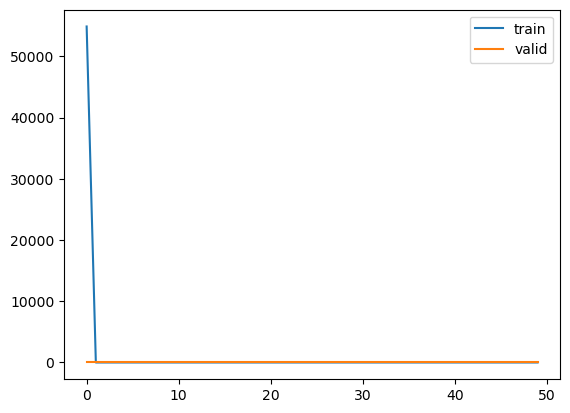

In [65]:
# Capturing learning history per epoch
hist  = pd.DataFrame(NN_history.history)
hist['epoch'] = NN_history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = NN_Predictor_Model1.evaluate(X_test, y_test)

In [66]:
y_Predict_NN=NN_Predictor_Model1.predict(X_test)
y_Predict_NN = (y_Predict_NN > 0.5)

590/590 [==============================] - 1s 2ms/step


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      8405
           1       0.55      1.00      0.71     10471

    accuracy                           0.55     18876
   macro avg       0.78      0.50      0.36     18876
weighted avg       0.75      0.55      0.40     18876



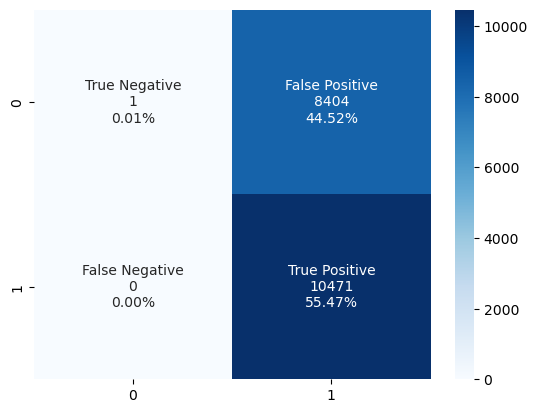

In [67]:
#Checking the performance of the NN to test data
make_confusion_matrix(y_test, y_Predict_NN,
                      cmap='Blues')

In [68]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [69]:
#Neural net tuning
NN_tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

Reloading Tuner from .\Job_\tuner0.json


In [70]:
NN_tuner.search_space_summary()

Search space summary
Default search space size: 9
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6 

In [71]:
### Searching the best model on X and y train
NN_tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [72]:
NN_tuner.results_summary()

Results summary
Results in .\Job_
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 224
units_1: 224
learning_rate: 0.001
units_2: 256
units_3: 256
units_4: 96
units_5: 256
units_6: 128
Score: 0.5036924282709757

Trial 3 summary
Hyperparameters:
num_layers: 4
units_0: 256
units_1: 160
learning_rate: 0.0001
units_2: 192
units_3: 192
units_4: 192
units_5: 32
units_6: 32
Score: 0.5028236508369446

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 192
units_1: 96
learning_rate: 0.01
units_2: 224
units_3: 64
units_4: 96
units_5: 256
units_6: 224
Score: 0.5024616320927938

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 96
units_1: 160
learning_rate: 0.01
units_2: 96
units_3: 32
units_4: 64
units_5: 256
units_6: 160
Score: 0.5015927950541178

Trial 0 summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 256
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
NN_Predictor2 = Sequential()
NN_Predictor2.add(Dense(96,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
NN_Predictor2.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor2.add(Dense(1, activation = 'sigmoid'))

In [75]:
NN_Predictor2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                9408      
                                                                 
 dense_1 (Dense)             (None, 256)               24832     
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [76]:
NN_optimizer = tf.keras.optimizers.Adam(0.001)
NN_Predictor2.compile(loss='binary_crossentropy',optimizer=NN_optimizer,metrics=['accuracy'])

In [77]:
NN_history2 = NN_Predictor2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
944/944 [==============================] - 6s 5ms/step - loss: 1.4558 - accuracy: 0.6124 - val_loss: 0.5738 - val_accuracy: 0.6976
Epoch 2/50
944/944 [==============================] - 5s 5ms/step - loss: 0.4632 - accuracy: 0.7993 - val_loss: 0.4180 - val_accuracy: 0.8183
Epoch 3/50
944/944 [==============================] - 5s 5ms/step - loss: 0.4744 - accuracy: 0.8306 - val_loss: 0.3093 - val_accuracy: 0.8696
Epoch 4/50
944/944 [==============================] - 5s 5ms/step - loss: 0.3205 - accuracy: 0.8656 - val_loss: 0.2923 - val_accuracy: 0.8760
Epoch 5/50
944/944 [==============================] - 5s 5ms/step - loss: 0.3127 - accuracy: 0.8700 - val_loss: 0.2544 - val_accuracy: 0.8963
Epoch 6/50
944/944 [==============================] - 5s 5ms/step - loss: 0.2941 - accuracy: 0.8773 - val_loss: 0.3369 - val_accuracy: 0.8572
Epoch 7/50
944/944 [==============================] - 4s 5ms/step - loss: 0.3061 - accuracy: 0.8744 - val_loss: 0.2586 - val_accuracy: 0.8918
Epoch 

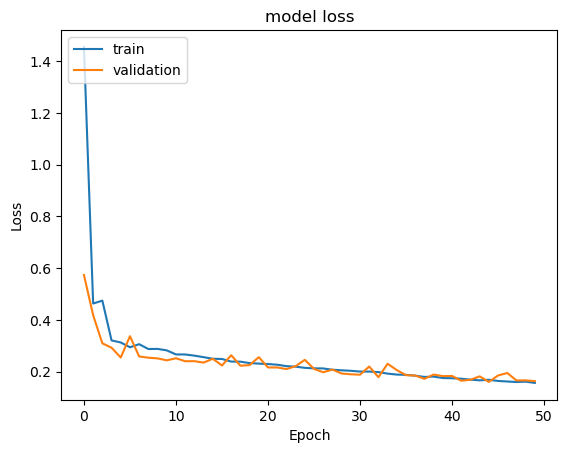

In [78]:
#Plotting Train Loss vs Validation Loss
plt.plot(NN_history2.history['loss'])
plt.plot(NN_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

590/590 [==============================] - 2s 3ms/step
Best Threshold=0.590298, G-Mean=0.933


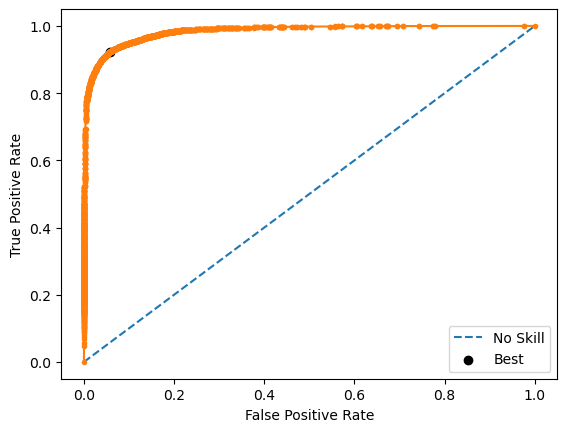

In [79]:
thresholds2, gmeans2, ix = neuralnet_roc_curve(NN_Predictor2, X_test, y_test)

590/590 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      8405
           1       0.95      0.92      0.94     10471

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876



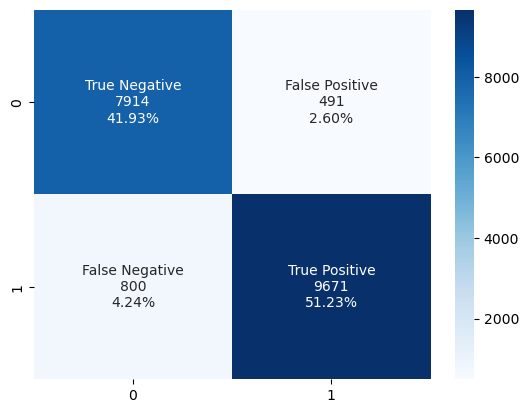

In [80]:
#Checking the performance of the tuned NN to test data
y_Predict2=NN_Predictor2.predict(X_test)
y_Predict2 = (y_Predict2 > thresholds2[ix])
make_confusion_matrix(y_test, y_Predict2,
                      cmap='Blues')

## Batch Normalization

In [81]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
NN_Predictor3 = Sequential()
NN_Predictor3.add(Dense(96,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor3.add(BatchNormalization())
NN_Predictor3.add(Dense(1, activation = 'sigmoid'))
NN_Predictor3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                9408      
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               24832     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               1

In [82]:
NN_Predictor3.compile(loss='binary_crossentropy',optimizer=NN_optimizer,metrics=['accuracy'])

In [83]:
NN_history3 = NN_Predictor3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
944/944 [==============================] - 10s 8ms/step - loss: 0.3912 - accuracy: 0.8163 - val_loss: 0.5457 - val_accuracy: 0.7910
Epoch 2/50
944/944 [==============================] - 9s 9ms/step - loss: 0.2852 - accuracy: 0.8803 - val_loss: 1.0274 - val_accuracy: 0.6722
Epoch 3/50
944/944 [==============================] - 6s 7ms/step - loss: 0.2740 - accuracy: 0.8867 - val_loss: 0.3272 - val_accuracy: 0.8639
Epoch 4/50
944/944 [==============================] - 6s 7ms/step - loss: 0.2749 - accuracy: 0.8864 - val_loss: 1.9453 - val_accuracy: 0.5497
Epoch 5/50
944/944 [==============================] - 6s 7ms/step - loss: 0.2717 - accuracy: 0.8882 - val_loss: 0.3479 - val_accuracy: 0.8536
Epoch 6/50
944/944 [==============================] - 6s 7ms/step - loss: 0.2633 - accuracy: 0.8879 - val_loss: 1.9136 - val_accuracy: 0.5809
Epoch 7/50
944/944 [==============================] - 7s 7ms/step - loss: 0.2506 - accuracy: 0.8909 - val_loss: 0.3222 - val_accuracy: 0.8831
Epoch

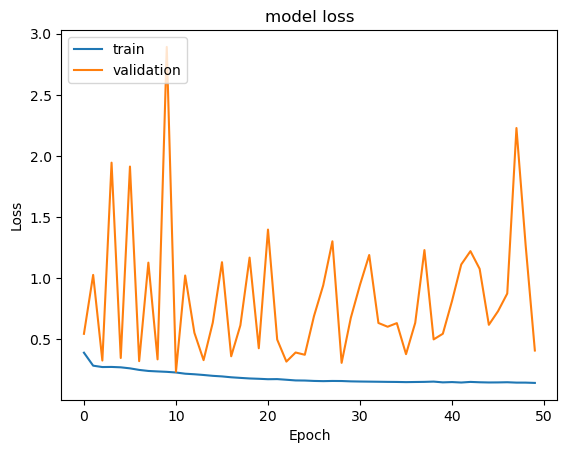

In [84]:
#Plotting Train Loss vs Validation Loss
plt.plot(NN_history3.history['loss'])
plt.plot(NN_history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

590/590 [==============================] - 2s 3ms/step
Best Threshold=0.816160, G-Mean=0.894


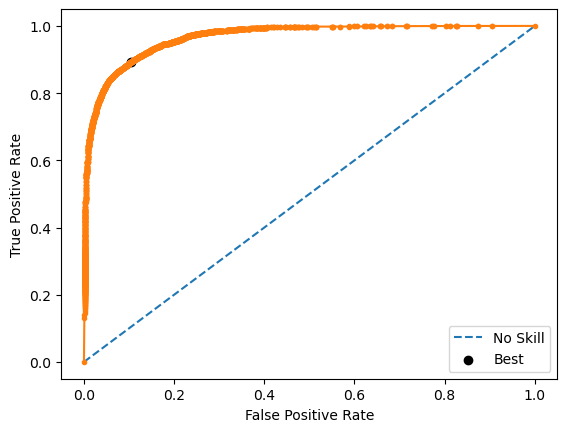

In [85]:
thresholds3, gmeans3, ix = neuralnet_roc_curve(NN_Predictor3, X_test, y_test)

590/590 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      8405
           1       0.91      0.89      0.90     10471

    accuracy                           0.89     18876
   macro avg       0.89      0.89      0.89     18876
weighted avg       0.89      0.89      0.89     18876



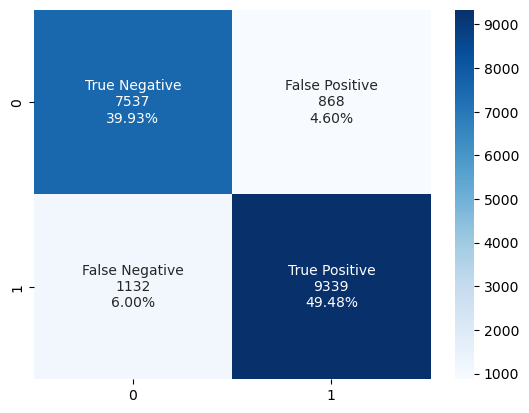

In [86]:
#Checking the performance of the NN to test data
y_Predict3=NN_Predictor3.predict(X_test)
y_Predict3 = (y_Predict3 > thresholds3[ix])
make_confusion_matrix(y_test, y_Predict3,
                      cmap='Blues')

## Dropout

In [87]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)
NN_Predictor4 = Sequential()
NN_Predictor4.add(Dense(96,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(Dropout(0.3))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(Dropout(0.3))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(Dropout(0.3))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(Dropout(0.3))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
NN_Predictor4.add(BatchNormalization())
NN_Predictor4.add(Dense(1, activation = 'sigmoid'))
NN_Predictor4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                9408      
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               24832     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                8

In [88]:
NN_Predictor4.compile(loss='binary_crossentropy',optimizer=NN_optimizer,metrics=['accuracy'])

In [89]:
NN_history4 = NN_Predictor4.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
944/944 [==============================] - 12s 9ms/step - loss: 0.6383 - accuracy: 0.6137 - val_loss: 0.9392 - val_accuracy: 0.5507
Epoch 2/50
944/944 [==============================] - 7s 8ms/step - loss: 0.3325 - accuracy: 0.8642 - val_loss: 0.3104 - val_accuracy: 0.8690
Epoch 3/50
944/944 [==============================] - 7s 8ms/step - loss: 0.2995 - accuracy: 0.8754 - val_loss: 1.5536 - val_accuracy: 0.5833
Epoch 4/50
944/944 [==============================] - 7s 8ms/step - loss: 0.2915 - accuracy: 0.8773 - val_loss: 0.6326 - val_accuracy: 0.7039
Epoch 5/50
944/944 [==============================] - 7s 8ms/step - loss: 0.2863 - accuracy: 0.8801 - val_loss: 0.2973 - val_accuracy: 0.8674
Epoch 6/50
944/944 [==============================] - 7s 8ms/step - loss: 0.2764 - accuracy: 0.8806 - val_loss: 0.2429 - val_accuracy: 0.8997
Epoch 7/50
944/944 [==============================] - 7s 8ms/step - loss: 0.2682 - accuracy: 0.8825 - val_loss: 0.2513 - val_accuracy: 0.8886
Epoch

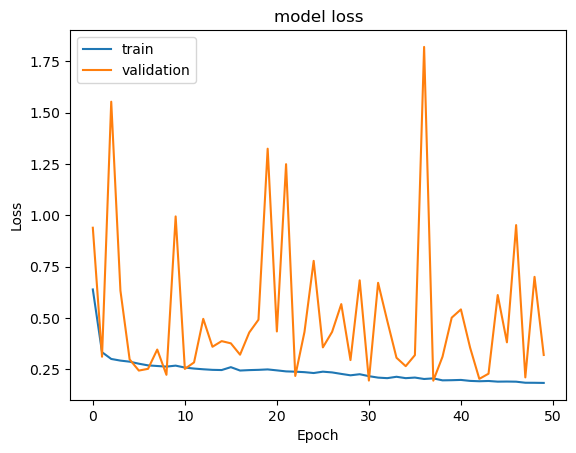

In [90]:
#Plotting Train Loss vs Validation Loss
plt.plot(NN_history4.history['loss'])
plt.plot(NN_history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

590/590 [==============================] - 2s 3ms/step
Best Threshold=0.933584, G-Mean=0.909


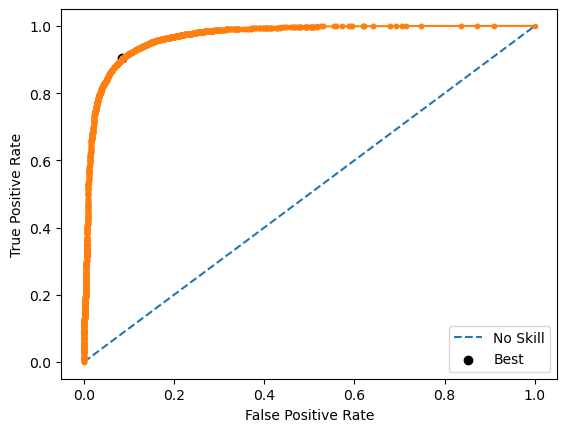

In [91]:
thresholds4, gmeans4, ix = neuralnet_roc_curve(NN_Predictor4, X_test, y_test)

590/590 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      8405
           1       0.93      0.90      0.92     10471

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



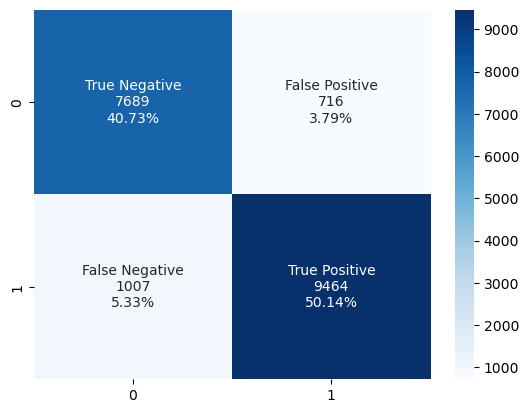

In [92]:
#Checking the performance of the NN to test data
y_Predict4=NN_Predictor4.predict(X_test)
y_Predict4 = (y_Predict4 > thresholds4[ix])
make_confusion_matrix(y_test, y_Predict4,
                      cmap='Blues')

# Predicting New Data

Decision trees had the best accuracy among the models tested. So, the decision tree will be used to predict the overall experience of the new customers.

In [93]:
#Read in the data
customer_travel = pd.read_csv('Traveldata_test.csv')
customer_survey = pd.read_csv('Surveydata_test.csv')

In [94]:
#Merge the data
customer = customer_travel.copy()
customer = customer.merge(customer_survey,how='inner', on = 'ID')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

In [95]:
customer_ID = customer['ID']
customer.drop('ID',axis=1,inplace=True)

In [96]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   35572 non-null  object 
 1   Customer_Type            32219 non-null  object 
 2   Age                      35591 non-null  float64
 3   Type_Travel              32154 non-null  object 
 4   Travel_Class             35602 non-null  object 
 5   Travel_Distance          35602 non-null  int64  
 6   Departure_Delay_in_Mins  35573 non-null  float64
 7   Arrival_Delay_in_Mins    35479 non-null  float64
 8   Seat_Comfort             35580 non-null  object 
 9   Seat_Class               35602 non-null  object 
 10  Arrival_Time_Convenient  32277 non-null  object 
 11  Catering                 32245 non-null  object 
 12  Platform_Location        35590 non-null  object 
 13  Onboard_Wifi_Service     35590 non-null  object 
 14  Onboard_Entertainment 

In [97]:
customer_num_cols = customer.select_dtypes(include = ['int64','float64']).columns.tolist() #List out numerical columns
customer_num_cols.remove('Travel_Distance')
customer_null_cols = customer.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
customer_null_cols.remove('Travel_Class')
customer_null_cols.remove('Seat_Class')
customer_null_cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Seat_Comfort',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [98]:
#Fill in missing values
customer[customer_null_cols] = MissingVal_FreqImputer.transform(customer[customer_null_cols])
customer[customer_num_cols] = MissingVal_AvgImputer.transform(customer[customer_num_cols])

In [99]:
customer_cat_cols = customer.select_dtypes(include = 'object').columns.tolist() #List out the categorical columns
# Apply one-hot encoding to the categorical columns
customer_encoded = X_LabelEncoder.transform(customer[customer_cat_cols])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
customer_encode_X = pd.DataFrame(customer_encoded, columns=X_LabelEncoder.get_feature_names_out(customer_cat_cols))

# Concatenate the one-hot encoded dataframe with the original dataframe
Xc = pd.concat([customer, customer_encode_X], axis=1)

# Drop the original categorical columns
Xc = Xc.drop(customer_cat_cols, axis=1)

In [100]:
Xc.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,...,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor
0,36.0,532,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21.0,1425,9.0,28.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60.0,2832,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,29.0,1352,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,1610,17.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
Customer_OverallExp_Prediction = DT_Predictor_Tuned.predict(Xc)

In [105]:
Customer_OverallExp = pd.DataFrame({
    'ID': customer_ID,
    'Overall_Experience': Customer_OverallExp_Prediction
})

In [106]:
Customer_OverallExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ID                  35602 non-null  int64
 1   Overall_Experience  35602 non-null  int64
dtypes: int64(2)
memory usage: 556.4 KB


In [107]:
Customer_OverallExp.to_csv('Submission_AxepAnalyst_OverallExperience.csv',index=False)